# 다차선 분석
- 2024.01.11 수정사항 반영
- 데이터
    - RSD데이터 : 매연RSD_도로측정데이터_20221004~20230910
    - 등록제원 : 230920_차량제원
    - 정밀검사 : 230920_정밀검사

# Library

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime as dt
import time
import math

In [2]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [3]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [4]:
start_time = time.time()

# Fold

In [5]:
raw_fold = 'D:/data/processing/multi_road/raw'
an_fold = 'D:/data/processing/multi_road/analysis'
df_fold = 'D:/data/processing/multi_road/df'
img_fold = 'D:/data/processing/multi_road/img'

## xlsx to csv

### 매연RSD 데이터

In [386]:
# 1m 52.8s
# 2024.01.12 데이터 수령
name = '매연RSD데이터(rawDATA)_20221004 ~ 20231210'
file_name = f'{name}.xlsx'
rsd = pd.read_excel(os.path.join(raw_fold, file_name))
rsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414226 entries, 0 to 414225
Data columns (total 80 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vdfRecordNumber   414226 non-null  int64  
 1   vdfUnit           414224 non-null  object 
 2   vdfDateTime       414226 non-null  object 
 3   vdfTime           414226 non-null  object 
 4   vdfRecordStatus   414226 non-null  object 
 5   vdfValid          414226 non-null  object 
 6   cvaSessionStatus  1326 non-null    object 
 7   bookendStatus     0 non-null       float64
 8   samSpeed          414226 non-null  float64
 9   samAccel          414226 non-null  float64
 10  samFlag           414226 non-null  object 
 11  vdfVSP            414226 non-null  float64
 12  perCO             414226 non-null  int64  
 13  perCO2            414226 non-null  int64  
 14  ppmHC             414226 non-null  int64  
 15  ppmHChex          414226 non-null  int64  
 16  ppmNO             41

In [387]:
# 6.6s
rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

### 제원정보

In [970]:
# 1m 52.8s
name = '제원정보_20240115'
file_name = f'{name}.xlsx'
cs = pd.read_excel(os.path.join(raw_fold, file_name))
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194603 entries, 0 to 194602
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   차량번호    194603 non-null  object 
 1   연료      187617 non-null  object 
 2   연식      187645 non-null  float64
 3   배기량     187621 non-null  float64
 4   차종      187645 non-null  object 
 5   총중량     187645 non-null  float64
 6   엔진형식    187627 non-null  object 
 7   등급      187645 non-null  object 
 8   차대번호    187645 non-null  object 
 9   차명      187645 non-null  object 
 10  폐차여부    187645 non-null  object 
dtypes: float64(3), object(8)
memory usage: 16.3+ MB


In [971]:
# 6.6s
cs.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

### 정기검사

In [ ]:
# 1m 52.8s
name = '정기검사_20240115'
file_name = f'{name}.xlsx'
jgt = pd.read_excel(os.path.join(raw_fold, file_name))
jgt.info()

In [ ]:
# 6.6s
jgt.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

### 정밀검사

In [972]:
eetr_cols = ['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6']
len(eetr_cols)

24

In [973]:
# 25.9s
name = '정밀검사_20240115'
file_name = f'{name}.xlsx'
eet = pd.read_excel(os.path.join(raw_fold, file_name), usecols=eetr_cols)
eet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146404 entries, 0 to 146403
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차대번호       146404 non-null  object 
 1   정밀검사일자     146404 non-null  int64  
 2   정밀검사종류     146404 non-null  object 
 3   관능검사판정     146404 non-null  object 
 4   정밀검사판정     146404 non-null  object 
 5   정밀검사측정방법   146404 non-null  object 
 6   무부하매연측정치1  142933 non-null  float64
 7   무부하매연허용치1  142930 non-null  float64
 8   무부하매연판정1   142929 non-null  object 
 9   무부하매연측정치2  106606 non-null  float64
 10  무부하매연허용치2  101669 non-null  float64
 11  무부하매연판정2   76936 non-null   object 
 12  무부하매연측정치3  95820 non-null   float64
 13  무부하매연허용치3  95817 non-null   float64
 14  무부하매연판정3   68016 non-null   object 
 15  무부하매연측정치4  95818 non-null   float64
 16  무부하매연허용치4  95815 non-null   float64
 17  무부하매연판정4   68011 non-null   object 
 18  무부하매연측정치5  95818 non-null   float64
 19  무부하매연허용치5  95815 non-nu

In [1459]:
eet['정밀검사일자'].describe()

c:\Users\kbjung\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


count     146404.00
mean    20221858.94
std         7286.53
min     20210601.00
25%     20220125.00
50%     20220823.00
75%     20230314.00
max     20230909.00
Name: 정밀검사일자, dtype: float64

In [974]:
# 0.6s
eet.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

# Load
- 원격 측정 정보(자스텍 제공)
- 차량제원(자스텍 제공)
- 정밀검사(자스텍 제공)

## 원격측정정보

In [975]:
rsd_cdict = {
    'vdfDateTime':'측정날짜',
    'vdfTime':'측정시간',
    'vdfRecordStatus':'기록상태',
    'vdfValid':'유효',
    'samSpeed':'속도',
    'samAccel':'가속도',
    'samFlag':'플래그',
    'vdfVSP':'VSP',
    'Smoke':'매연',
    'V_PLATE':'차량번호',
    'LineNo':'차선번호',
    'Wind speed':'풍속',
    'Humidity':'습도', 
    'Temp':'온도',
    'siteCode':'측정장소코드',
    }
len(rsd_cdict)

15

In [976]:
# 1s
name = '매연RSD데이터(rawDATA)_20221004 ~ 20231210'
file_name = f'{name}.csv'
rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())
rsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414226 entries, 0 to 414225
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   vdfDateTime      414226 non-null  object 
 1   vdfTime          414226 non-null  object 
 2   vdfRecordStatus  414226 non-null  object 
 3   vdfValid         414226 non-null  object 
 4   samSpeed         414226 non-null  float64
 5   samAccel         414226 non-null  float64
 6   samFlag          414226 non-null  object 
 7   vdfVSP           414226 non-null  float64
 8   Smoke            414226 non-null  float64
 9   V_PLATE          414226 non-null  object 
 10  LineNo           253037 non-null  float64
 11  Wind speed       195040 non-null  float64
 12  Humidity         243226 non-null  float64
 13  Temp             414226 non-null  float64
 14  siteCode         110 non-null     object 
dtypes: float64(8), object(7)
memory usage: 47.4+ MB


C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\2541490547.py:4: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())


In [977]:
rsd.columns

Index(['vdfDateTime', 'vdfTime', 'vdfRecordStatus', 'vdfValid', 'samSpeed',
       'samAccel', 'samFlag', 'vdfVSP', 'Smoke', 'V_PLATE', 'LineNo',
       'Wind speed', 'Humidity', 'Temp', 'siteCode'],
      dtype='object')

In [978]:
rsdr = rsd.rename(columns=rsd_cdict)
rsdr.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드'],
      dtype='object')

In [979]:
rsdr.head()

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
0,01-02-2023,09:03:00,N,V,56.10,0.00,V,13.29,6.30,38러2039,NaN,NaN,NaN,0.00,NaN
1,01-02-2023,09:03:08,N,V,58.60,0.70,V,17.34,1.00,274모8753,NaN,NaN,NaN,0.00,NaN
2,01-02-2023,09:03:14,N,V,57.70,-0.80,V,9.92,0.90,45라0943,NaN,NaN,NaN,0.00,NaN
3,01-02-2023,09:03:20,N,V,53.50,0.20,V,13.45,0.70,34로8928,NaN,NaN,NaN,0.00,NaN
4,01-02-2023,09:03:28,N,V,49.70,-0.70,V,8.72,1.10,91모3601,NaN,NaN,NaN,0.00,NaN


### [출력] csv

In [980]:
name

'매연RSD데이터(rawDATA)_20221004 ~ 20231210'

In [981]:
# # 1s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

## 차량제원

In [982]:
# 0.5s
cs = pd.read_csv(os.path.join(raw_fold, '제원정보_20240115.csv'))
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194603 entries, 0 to 194602
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   차량번호    194603 non-null  object 
 1   연료      187617 non-null  object 
 2   연식      187645 non-null  float64
 3   배기량     187621 non-null  float64
 4   차종      187645 non-null  object 
 5   총중량     187645 non-null  float64
 6   엔진형식    187627 non-null  object 
 7   등급      187645 non-null  object 
 8   차대번호    187645 non-null  object 
 9   차명      187645 non-null  object 
 10  폐차여부    187645 non-null  object 
dtypes: float64(3), object(8)
memory usage: 16.3+ MB


## 정밀검사

In [983]:
# eetr_cols = ['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6']
# len(eetr_cols)

In [984]:
# 0.5s
# eetr = pd.read_csv(os.path.join(raw_fold, '정밀검사_20240115.csv'), usecols=eetr_cols)
eetr = pd.read_csv(os.path.join(raw_fold, '정밀검사_20240115.csv'))
eetr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146404 entries, 0 to 146403
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차대번호       146404 non-null  object 
 1   정밀검사일자     146404 non-null  int64  
 2   정밀검사종류     146404 non-null  object 
 3   관능검사판정     146404 non-null  object 
 4   정밀검사판정     146404 non-null  object 
 5   정밀검사측정방법   146404 non-null  object 
 6   무부하매연측정치1  142933 non-null  float64
 7   무부하매연허용치1  142930 non-null  float64
 8   무부하매연판정1   142929 non-null  object 
 9   무부하매연측정치2  106606 non-null  float64
 10  무부하매연허용치2  101669 non-null  float64
 11  무부하매연판정2   76936 non-null   object 
 12  무부하매연측정치3  95820 non-null   float64
 13  무부하매연허용치3  95817 non-null   float64
 14  무부하매연판정3   68016 non-null   object 
 15  무부하매연측정치4  95818 non-null   float64
 16  무부하매연허용치4  95815 non-null   float64
 17  무부하매연판정4   68011 non-null   object 
 18  무부하매연측정치5  95818 non-null   float64
 19  무부하매연허용치5  95815 non-nu

In [985]:
eetr.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

# Preprocessing

## 원격측정정보

### 측정날짜, 측정시간 전처리
- datetime type으로 변환

In [986]:
rsdr[['측정날짜', '측정시간']].head()

,측정날짜,측정시간
0,01-02-2023,09:03:00
1,01-02-2023,09:03:08
2,01-02-2023,09:03:14
3,01-02-2023,09:03:20
4,01-02-2023,09:03:28


In [987]:
rsdr[['측정날짜', '측정시간']].isnull().sum()

측정날짜    0
측정시간    0
dtype: int64

In [988]:
rsdr[['측정날짜', '측정시간']].dtypes

측정날짜    object
측정시간    object
dtype: object

In [989]:
rsdr['측정날짜'] = pd.to_datetime(rsdr['측정날짜'])

In [990]:
rsdr.head()

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
0,2023-01-02,09:03:00,N,V,56.10,0.00,V,13.29,6.30,38러2039,NaN,NaN,NaN,0.00,NaN
1,2023-01-02,09:03:08,N,V,58.60,0.70,V,17.34,1.00,274모8753,NaN,NaN,NaN,0.00,NaN
2,2023-01-02,09:03:14,N,V,57.70,-0.80,V,9.92,0.90,45라0943,NaN,NaN,NaN,0.00,NaN
3,2023-01-02,09:03:20,N,V,53.50,0.20,V,13.45,0.70,34로8928,NaN,NaN,NaN,0.00,NaN
4,2023-01-02,09:03:28,N,V,49.70,-0.70,V,8.72,1.10,91모3601,NaN,NaN,NaN,0.00,NaN


In [991]:
rsdr.shape[0], len(rsdr['차량번호'].unique())

(414226, 191052)

## 차량제원

In [992]:
cs.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명',
       '폐차여부'],
      dtype='object')

In [993]:
cs.head()

,차량번호,연료,연식,배기량,차종,총중량,엔진형식,등급,차대번호,차명,폐차여부
0,000다7359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,006가1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,006가1353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,006가2474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,006가3249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [994]:
cs.shape

(194603, 11)

In [995]:
cs['폐차여부'].value_counts(dropna=False)

폐차여부
N      180264
Y        7381
NaN      6958
Name: count, dtype: int64

In [996]:
csn = cs[cs['폐차여부'] != 'Y'].reset_index(drop=True)
csn.shape

(187222, 11)

In [997]:
csn = csn.drop_duplicates().reset_index(drop=True)
csn.shape

(187222, 11)

In [998]:
csn.shape[0], len(csn['차량번호'].unique())

(187222, 187222)

In [999]:
csn.shape[0], len(csn['차대번호'].unique())

(187222, 180265)

In [1000]:
csn.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명',
       '폐차여부'],
      dtype='object')

## 정밀검사

In [1001]:
eetr.shape

(146404, 24)

In [1002]:
eetr.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [1003]:
eetr['정밀검사일자'].dtype

dtype('int64')

In [1004]:
eetr['정밀검사일자'].isnull().sum()

0

In [1005]:
# 2.1s
eetr['정밀검사일자'] = pd.to_datetime(eetr['정밀검사일자'], format="%Y%m%d")

In [1006]:
eetr['정밀검사일자'].isnull().sum()

0

In [1007]:
eetr['정밀검사일자'].head()

0   2022-04-15
1   2022-05-25
2   2022-05-02
3   2023-01-25
4   2022-03-02
Name: 정밀검사일자, dtype: datetime64[ns]

### 최신검사만

In [1008]:
eetr_total = eetr.copy()
eetr_total.shape

(146404, 24)

In [1009]:
# 0s
# 113320, 77561
eetr.shape[0], len(eetr['차대번호'].unique())

(146404, 100950)

In [1010]:
# 0s
eetr = eetr.sort_values('정밀검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
eetr.shape

(100950, 24)

### 2022년 1월부터 사용

In [1011]:
eetr['정밀검사일자'].head()

0   2023-09-09
1   2023-09-09
2   2023-09-09
3   2023-09-09
4   2023-09-09
Name: 정밀검사일자, dtype: datetime64[ns]

In [1012]:
# 0s
eetr = eetr[eetr['정밀검사일자'] >= '2022-01-01'].reset_index(drop=True)
eetr.shape

(90240, 24)

In [1013]:
eetr['차대번호'].isnull().sum()

0

## 원격&차량제원

In [1014]:
rsdr.shape

(414226, 15)

In [1015]:
rsdr.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드'],
      dtype='object')

In [1016]:
csn.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명',
       '폐차여부'],
      dtype='object')

In [1017]:
# 0.3s
rcs = rsdr.merge(csn, on='차량번호', how='left')
rcs.shape

(414226, 25)

In [1018]:
rcs[['차량번호', '차대번호', '연료']].isnull().sum()

차량번호        0
차대번호    22389
연료      22420
dtype: int64

In [1019]:
rcs.loc[(rcs['차대번호'].isnull() == True) & (rcs['차량번호'] != '********'), '차량번호'].shape

(22389,)

In [1020]:
rcs.loc[(rcs['차대번호'].isnull() == True) & (rcs['차량번호'] != '********'), '차량번호'].head()

0      38러2039
11     52루0591
20    813아7487
23     76마5257
40     28우8810
Name: 차량번호, dtype: object

In [1021]:
rsdr[rsdr['차량번호'] == '52루0591']

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,차선번호,풍속,습도,온도,측정장소코드
11,2023-01-02,09:04:06,N,V,48.30,-0.10,V,10.80,1.10,52루0591,NaN,NaN,NaN,0.00,NaN
382441,2022-11-24,10:03:15,N,V,58.20,0.70,V,17.20,0.40,52루0591,NaN,NaN,NaN,0.00,NaN


In [1022]:
cs[cs['차량번호'] == '52루0591']

,차량번호,연료,연식,배기량,차종,총중량,엔진형식,등급,차대번호,차명,폐차여부
122231,52루0591,휘발유,2013.00,1591.00,승용,1535.00,G4FD,2,KNAFK412BDA053005,K3,Y


In [1023]:
csn[csn['차량번호'] == '52루0591']

,차량번호,연료,연식,배기량,차종,총중량,엔진형식,등급,차대번호,차명,폐차여부


In [1024]:
rcs.shape[0], len(rcs['차대번호'].unique())

(414226, 180265)

## 원격&차량제원&정밀

In [1025]:
rcs.shape

(414226, 25)

In [1026]:
eetr.shape

(90240, 24)

In [1027]:
rcs.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부'],
      dtype='object')

In [1028]:
eetr.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [1029]:
eetr['정밀검사일자'].isnull().sum()

0

In [1030]:
# 38.8s
rcse = rcs.merge(eetr, on='차대번호', how='left')
rcse.shape

(414226, 48)

In [1031]:
rcse[['차량번호', '연료', '정밀검사일자']].isnull().sum()

차량번호           0
연료         22420
정밀검사일자    227589
dtype: int64

### [출력] 원격&제원&정밀

In [1032]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240115'

In [1033]:
rcse.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [1034]:
rcse_cols = [
    # 원격측정정보
    '측정날짜',
    '측정시간',
    '기록상태',
    '유효',
    '속도',
    '가속도',
    '플래그',
    'VSP',
    '매연',
    '차량번호',
    '차선번호',
    '풍속',
    '습도',
    '온도',
    '측정장소코드',
    
    # 제원정보
    '연료', 
    '연식', 
    '배기량', 
    '차종', 
    '총중량',
    '엔진형식', 
    '등급', 
    '차대번호', 
    '차명', 
    '폐차여부', 
    
    # 정밀검사
    '정밀검사일자', 
    '정밀검사종류', 
    '관능검사판정',
    '정밀검사판정', 
    '정밀검사측정방법', 
    '무부하매연측정치1',  # CO(매연)
    '무부하매연허용치1', 
    '무부하매연판정1', 
    '무부하매연측정치2',
    '무부하매연허용치2', 
    '무부하매연판정2', 
    '무부하매연측정치3', # NOx 
    '무부하매연허용치3', 
    '무부하매연판정3',
    '무부하매연측정치4', 
    '무부하매연허용치4', 
    '무부하매연판정4', 
    '무부하매연측정치5', 
    '무부하매연허용치5',
    '무부하매연판정5', 
    '무부하매연측정치6', 
    '무부하매연허용치6', 
    '무부하매연판정6'
    ]
len(rcse_cols)

48

In [1035]:
rcse.shape

(414226, 48)

In [1254]:
# 10.6s
file_name = f'원격_차량제원_정밀({today_date}).csv'
rcse[rcse_cols].to_csv(os.path.join(raw_fold, file_name), index=False)
print(f'{file_name} 출력 완료.')

원격_차량제원_정밀(20240115).csv 출력 완료.


In [1453]:
# 2m 48.5s
file_name = f'원격_차량제원_정밀({today_date}).xlsx'
rcse[rcse_cols].to_excel(os.path.join(raw_fold, file_name), index=False)
print(f'{file_name} 출력 완료.')

원격_차량제원_정밀(20240115).xlsx 출력 완료.


## 유효데이터만 추출
- vdfRecordStatus = N
- vdfValid = V
- samFlag = V
- 자동차등록번호 : nan, 오류 값(********) 제외
- 매연 5% 초과 제외

In [1037]:
rcse['차선번호'].value_counts(dropna=False)

차선번호
NaN     161189
2.00    110168
1.00     73409
3.00     69460
Name: count, dtype: int64

In [1038]:
rcse.loc[rcse['차선번호'].isnull() == False, '측정날짜'].sort_values()

150600   2023-08-14
151567   2023-08-14
151566   2023-08-14
151565   2023-08-14
151564   2023-08-14
            ...    
413989   2023-12-10
413988   2023-12-10
413987   2023-12-10
413995   2023-12-10
414225   2023-12-10
Name: 측정날짜, Length: 253037, dtype: datetime64[ns]

In [1039]:
temp = rcse.loc[rcse['차선번호'].isnull() == False]
temp['측정날짜'] = pd.to_datetime(temp['측정날짜'], errors='coerce')

C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\3811848111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['측정날짜'] = pd.to_datetime(temp['측정날짜'], errors='coerce')


In [1040]:
temp['측정날짜'].describe()

count                           253037
mean     2023-10-09 14:22:40.373383936
min                2023-08-14 00:00:00
25%                2023-09-08 00:00:00
50%                2023-10-09 00:00:00
75%                2023-11-09 00:00:00
max                2023-12-10 00:00:00
Name: 측정날짜, dtype: object

In [1041]:
rcse.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [1042]:
rcse['차량번호'].head()

0     38러2039
1    274모8753
2     45라0943
3     34로8928
4     91모3601
Name: 차량번호, dtype: object

In [1043]:
rcse.shape, len(rcse['차량번호'].unique())

((414226, 48), 191052)

In [1044]:
rcse['차량번호'].isnull().sum()

0

In [1045]:
rcse[rcse['차량번호'] == '********'].shape

(0, 48)

In [1046]:
# N : 일반데이터, C : 교정 중 측정된자료, A : Audit데이터(표준필터 측정값)
rcse['기록상태'].value_counts(dropna=False)

기록상태
N    414226
Name: count, dtype: int64

In [1047]:
# V : 일반데이터, x : 교정중
rcse['유효'].value_counts(dropna=False)

유효
V    414226
Name: count, dtype: int64

In [1048]:
# V : 일반데이터, x : 교정중
rcse['플래그'].value_counts(dropna=False)

플래그
V    414226
Name: count, dtype: int64

In [1049]:
rcse[['속도', '가속도', '매연']].describe()

,속도,가속도,매연
count,414226.00,414226.00,414226.00
mean,68.56,-0.52,1.08
std,14.20,0.93,2.17
min,1.00,-25.00,0.00
25%,59.40,-1.08,0.00
50%,68.04,-0.36,0.50
75%,77.76,0.00,1.10
max,119.88,25.00,29.80


In [1050]:
rcse.loc[rcse['기록상태'] == 'N', '유효'].value_counts(dropna=False)

유효
V    414226
Name: count, dtype: int64

In [1051]:
rcse.loc[rcse['기록상태'] == 'N', '플래그'].value_counts(dropna=False)

플래그
V    414226
Name: count, dtype: int64

In [1052]:
rcse['매연'].describe()

count   414226.00
mean         1.08
std          2.17
min          0.00
25%          0.00
50%          0.50
75%          1.10
max         29.80
Name: 매연, dtype: float64

In [1053]:
rcse.shape

(414226, 48)

In [1054]:
# vdfRecordStatus = N, vdfValid = V, samFlag = V, 차량번호 : nan, 오류 값(********) 제외, 매연 5% 초과 제외
df = rcse[(rcse['기록상태'] == 'N') & (rcse['유효'] == 'V') & (rcse['플래그'] == 'V') & (rcse['차량번호'] != '********') & (rcse['차량번호'].isnull() == False) & (rcse['매연'] <= 5) & (rcse['매연'] >= 0)].reset_index(drop=True)
df.shape

(396394, 48)

In [1055]:
df[['속도', '가속도', '매연']].describe()

,속도,가속도,매연
count,396394.00,396394.00,396394.00
mean,68.59,-0.52,0.70
std,14.17,0.93,0.90
min,1.00,-25.00,0.00
25%,59.40,-1.08,0.00
50%,68.04,-0.36,0.40
75%,77.76,0.00,0.90
max,119.88,25.00,5.00


### [출력] 유효데이터

In [1255]:
# 8.0s
file_name = f'유효데이터(원격_차량제원_정밀)({today_date}).csv'
df.to_csv(os.path.join(raw_fold, file_name), index=False)
print(f'{file_name} 출력 완료.')

유효데이터(원격_차량제원_정밀)(20240115).csv 출력 완료.


In [1454]:
# 3m 23.8s
file_name = f'유효데이터(원격_차량제원_정밀)({today_date}).xlsx'
df.to_excel(os.path.join(raw_fold, file_name), index=False)
print(f'{file_name} 출력 완료.')

유효데이터(원격_차량제원_정밀)(20240115).xlsx 출력 완료.


# Load csv

## [로드] 원격&차량제원&정밀

In [1256]:
start_time = time.time()

In [1257]:
# 3.3s
name = '원격_차량제원_정밀(20240115)'
file_name = f'{name}.csv'
rcse = pd.read_csv(os.path.join(df_fold, file_name), low_memory=False)
rcse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414226 entries, 0 to 414225
Data columns (total 48 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   측정날짜       414226 non-null  object 
 1   측정시간       414226 non-null  object 
 2   기록상태       414226 non-null  object 
 3   유효         414226 non-null  object 
 4   속도         414226 non-null  float64
 5   가속도        414226 non-null  float64
 6   플래그        414226 non-null  object 
 7   VSP        414226 non-null  float64
 8   매연         414226 non-null  float64
 9   차량번호       414226 non-null  object 
 10  차선번호       253037 non-null  float64
 11  풍속         195040 non-null  float64
 12  습도         243226 non-null  float64
 13  온도         414226 non-null  float64
 14  측정장소코드     110 non-null     object 
 15  연료         324218 non-null  object 
 16  연식         324246 non-null  float64
 17  배기량        324222 non-null  float64
 18  차종         324246 non-null  object 
 19  총중량        324246 non-n

## [로드] 유효데이터

In [1258]:
# 2.3s
name = '유효데이터(원격_차량제원_정밀)(20240115)'
file_name = f'{name}.csv'
df = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396394 entries, 0 to 396393
Data columns (total 57 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   측정날짜       396394 non-null  object 
 1   측정시간       396394 non-null  object 
 2   기록상태       396394 non-null  object 
 3   유효         396394 non-null  object 
 4   속도         396394 non-null  float64
 5   가속도        396394 non-null  float64
 6   플래그        396394 non-null  object 
 7   VSP        396394 non-null  float64
 8   매연         396394 non-null  float64
 9   차량번호       396394 non-null  object 
 10  차선번호       237995 non-null  float64
 11  풍속         180754 non-null  float64
 12  습도         228239 non-null  float64
 13  온도         396394 non-null  float64
 14  측정장소코드     104 non-null     object 
 15  연료         312775 non-null  object 
 16  연식         312802 non-null  float64
 17  배기량        312779 non-null  float64
 18  차종         312802 non-null  object 
 19  총중량        312802 non-n

## Pre

### 타입 변환

In [1259]:
df[['측정날짜', '정밀검사일자']].dtypes

측정날짜      object
정밀검사일자    object
dtype: object

In [1260]:
df[['측정날짜', '정밀검사일자']].isnull().sum()

측정날짜           0
정밀검사일자    244200
dtype: int64

In [1261]:
df[['측정날짜', '정밀검사일자']].head()

,측정날짜,정밀검사일자
0,2023-01-02,NaN
1,2023-01-02,NaN
2,2023-01-02,2022-10-28
3,2023-01-02,NaN
4,2023-01-02,NaN


In [1262]:
df['측정날짜'] = pd.to_datetime(df['측정날짜'])
df['정밀검사일자'] = pd.to_datetime(df['정밀검사일자'], errors='coerce')

In [1263]:
df[['측정날짜', '정밀검사일자']].dtypes

측정날짜      datetime64[ns]
정밀검사일자    datetime64[ns]
dtype: object

In [1264]:
df[['측정날짜', '정밀검사일자']].isnull().sum()

측정날짜           0
정밀검사일자    244200
dtype: int64

In [1265]:
df[['측정날짜', '정밀검사일자']].head()

,측정날짜,정밀검사일자
0,2023-01-02,NaT
1,2023-01-02,NaT
2,2023-01-02,2022-10-28
3,2023-01-02,NaT
4,2023-01-02,NaT


### 구간 설정

#### 속도

In [1266]:
df['속도'].describe()

count   396394.00
mean        68.59
std         14.17
min          1.00
25%         59.40
50%         68.04
75%         77.76
max        119.88
Name: 속도, dtype: float64

In [1267]:
df['속도'].isnull().sum()

0

In [1268]:
math.ceil(df['속도'].max())

120

In [1269]:
div = 10
n = 1
num = math.ceil(df['속도'].max())
for i in range(0, num, div):
    print(f'{n} : {i} ~ {i + div}')
    n += 1

1 : 0 ~ 10
2 : 10 ~ 20
3 : 20 ~ 30
4 : 30 ~ 40
5 : 40 ~ 50
6 : 50 ~ 60
7 : 60 ~ 70
8 : 70 ~ 80
9 : 80 ~ 90
10 : 90 ~ 100
11 : 100 ~ 110
12 : 110 ~ 120


In [1270]:
# 속도 구간 나누기(10단위)
div = 10
n = 1
num = math.ceil(df['속도'].max())
for i in range(0, num, div):
    df.loc[(df['속도'] >= i) & (df['속도'] < i + div), '속도구분'] = f'{i}이상 {i + div}미만'
    df.loc[(df['속도'] >= i) & (df['속도'] < i + div), '속도구분인덱스'] = n
    n += 1

In [1271]:
df['속도구분'].unique()

array(['50이상 60미만', '40이상 50미만', '60이상 70미만', '70이상 80미만', '30이상 40미만',
       '20이상 30미만', '80이상 90미만', '110이상 120미만', '0이상 10미만', '10이상 20미만',
       '90이상 100미만', '100이상 110미만'], dtype=object)

In [1272]:
df['속도구분인덱스'].unique()

array([ 6.,  5.,  7.,  8.,  4.,  3.,  9., 12.,  1.,  2., 10., 11.])

#### 배기량

In [1273]:
df['배기량'].isnull().sum()

83615

In [1274]:
df['배기량'].describe()

count   312779.00
mean      2354.68
std       1511.46
min          0.00
25%       1598.00
50%       1999.00
75%       2497.00
max      16991.00
Name: 배기량, dtype: float64

In [1275]:
div = 1000
n = 1
num = math.ceil(df['배기량'].max() / div)
for i in range(1, num):
    print(f'{n} : {i*div} ~ {(i + 1) * 1000}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000
6 : 6000 ~ 7000
7 : 7000 ~ 8000
8 : 8000 ~ 9000
9 : 9000 ~ 10000
10 : 10000 ~ 11000
11 : 11000 ~ 12000
12 : 12000 ~ 13000
13 : 13000 ~ 14000
14 : 14000 ~ 15000
15 : 15000 ~ 16000
16 : 16000 ~ 17000


In [1276]:
div = 1000
n = 1
num = math.ceil(df['배기량'].max() / div)
for i in range(1, num):
    df.loc[(df['배기량'] >= i * div) & (df['배기량'] < (i + 1) * div), '배기량구분'] = f'{i}천이상 {i + 1}천미만'
    df.loc[(df['배기량'] >= i * div) & (df['배기량'] < (i + 1) * div), '배기량구분인덱스'] = n
    n += 1

In [1277]:
df['배기량구분'].unique()

array([nan, '1천이상 2천미만', '2천이상 3천미만', '3천이상 4천미만', '6천이상 7천미만',
       '5천이상 6천미만', '11천이상 12천미만', '12천이상 13천미만', '8천이상 9천미만',
       '9천이상 10천미만', '10천이상 11천미만', '4천이상 5천미만', '16천이상 17천미만',
       '7천이상 8천미만', '15천이상 16천미만', '14천이상 15천미만'], dtype=object)

In [1278]:
df['배기량구분인덱스'].unique()

array([nan,  1.,  2.,  3.,  6.,  5., 11., 12.,  8.,  9., 10.,  4., 16.,
        7., 15., 14.])

#### 차량중량(총중량)

In [1279]:
df['총중량'].isnull().sum()

83592

In [1280]:
df['총중량'].describe()

count   312802.00
mean      2708.61
std       3009.99
min          0.00
25%       1780.00
50%       2030.00
75%       2670.00
max      39990.00
Name: 총중량, dtype: float64

In [1281]:
div = 1000
n = 1
num = math.ceil(df['총중량'].max() / div)
for i in range(1, num):
    print(f'{n} : {i*div} ~ {(i + 1) * div}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000
6 : 6000 ~ 7000
7 : 7000 ~ 8000
8 : 8000 ~ 9000
9 : 9000 ~ 10000
10 : 10000 ~ 11000
11 : 11000 ~ 12000
12 : 12000 ~ 13000
13 : 13000 ~ 14000
14 : 14000 ~ 15000
15 : 15000 ~ 16000
16 : 16000 ~ 17000
17 : 17000 ~ 18000
18 : 18000 ~ 19000
19 : 19000 ~ 20000
20 : 20000 ~ 21000
21 : 21000 ~ 22000
22 : 22000 ~ 23000
23 : 23000 ~ 24000
24 : 24000 ~ 25000
25 : 25000 ~ 26000
26 : 26000 ~ 27000
27 : 27000 ~ 28000
28 : 28000 ~ 29000
29 : 29000 ~ 30000
30 : 30000 ~ 31000
31 : 31000 ~ 32000
32 : 32000 ~ 33000
33 : 33000 ~ 34000
34 : 34000 ~ 35000
35 : 35000 ~ 36000
36 : 36000 ~ 37000
37 : 37000 ~ 38000
38 : 38000 ~ 39000
39 : 39000 ~ 40000


In [1282]:
math.ceil(df['총중량'].max()/1000)

40

In [1283]:
div = 1000
n = 1
num = math.ceil(df['총중량'].max()/div)
for i in range(0, num):
    df.loc[(df['총중량'] >= i * div) & (df['총중량'] < (i + div) * div), '총중량구분'] = f'{i}천이상 {i + 1}천미만'
    df.loc[(df['총중량'] >= i * div) & (df['총중량'] < (i + div) * div), '총중량구분인덱스'] = n
    n += 1

In [1284]:
df['총중량구분'].unique()

array(['1천이상 2천미만', '2천이상 3천미만', '3천이상 4천미만', nan, '13천이상 14천미만',
       '7천이상 8천미만', '11천이상 12천미만', '14천이상 15천미만', '10천이상 11천미만',
       '38천이상 39천미만', '26천이상 27천미만', '9천이상 10천미만', '15천이상 16천미만',
       '5천이상 6천미만', '0천이상 1천미만', '4천이상 5천미만', '30천이상 31천미만', '6천이상 7천미만',
       '28천이상 29천미만', '16천이상 17천미만', '21천이상 22천미만', '8천이상 9천미만',
       '12천이상 13천미만', '20천이상 21천미만', '39천이상 40천미만', '25천이상 26천미만',
       '17천이상 18천미만', '19천이상 20천미만', '35천이상 36천미만', '36천이상 37천미만',
       '37천이상 38천미만', '24천이상 25천미만', '22천이상 23천미만', '27천이상 28천미만',
       '18천이상 19천미만', '31천이상 32천미만', '29천이상 30천미만', '33천이상 34천미만',
       '23천이상 24천미만', '34천이상 35천미만', '32천이상 33천미만'], dtype=object)

In [1285]:
df['총중량구분인덱스'].unique()

array([ 2.,  3.,  4., nan, 14.,  8., 12., 15., 11., 39., 27., 10., 16.,
        6.,  1.,  5., 31.,  7., 29., 17., 22.,  9., 13., 21., 40., 26.,
       18., 20., 36., 37., 38., 25., 23., 28., 19., 32., 30., 34., 24.,
       35., 33.])

#### 매연농도(원격)
- 농도별(0.5 단위) : 0 이상 0.5미만, …

In [1286]:
df['매연'].describe()

count   396394.00
mean         0.70
std          0.90
min          0.00
25%          0.00
50%          0.40
75%          0.90
max          5.00
Name: 매연, dtype: float64

In [1287]:
div = 0.5
n = 0
for i in range(9):
    print(f'{i + 1} : {n} ~ {n + div}')
    n += div

1 : 0 ~ 0.5
2 : 0.5 ~ 1.0
3 : 1.0 ~ 1.5
4 : 1.5 ~ 2.0
5 : 2.0 ~ 2.5
6 : 2.5 ~ 3.0
7 : 3.0 ~ 3.5
8 : 3.5 ~ 4.0
9 : 4.0 ~ 4.5


In [1288]:
div = 0.5
n = 0
for i in range(9):
    df.loc[(df['매연'] >= n) & (df['매연'] < n + div), '매연구분'] = f'{n}이상 {n + div}미만'
    df.loc[(df['매연'] >= n) & (df['매연'] < n + div), '매연구분인덱스'] = i + 1
    n += div
df.loc[df['매연'] >= n, '매연구분'] = f'{n}이상'
df.loc[df['매연'] >= n, '매연구분인덱스'] = i + 2

In [1289]:
df['매연구분'].unique()

array(['1.0이상 1.5미만', '0.5이상 1.0미만', '1.5이상 2.0미만', '3.0이상 3.5미만',
       '2.0이상 2.5미만', '0이상 0.5미만', '4.5이상', '3.5이상 4.0미만', '2.5이상 3.0미만',
       '4.0이상 4.5미만'], dtype=object)

In [1290]:
df['매연구분인덱스'].unique()

array([ 3.,  2.,  4.,  7.,  5.,  1., 10.,  8.,  6.,  9.])

#### 연식
- 2004년 이전(~ 2003년 이하)은 한가지 구분으로 묶기 : 2003년이하

In [1291]:
df['연식'].dtype

dtype('float64')

In [1292]:
df['연식'].unique()

array([2021., 2016., 2013., 2020., 2015., 2012., 2011., 2006., 2008.,
         nan, 2010., 2017., 2004., 2018., 2022., 2014., 2007., 2009.,
       2019., 2023., 2002., 2001., 2005., 2003., 1993., 1995., 2024.,
       1999., 1998., 1997., 1996., 2000., 1983., 1992., 1994., 1991.,
       1990., 1988.])

In [1293]:
df.loc[df['연식'] <= 2000, '연식구분'] = '2000년 이하'
df.loc[df['연식구분'].isnull(), '연식구분'] = df.loc[df['연식구분'].isnull(), '연식']

In [1294]:
df['연식구분'].unique()

array(['2021.0', '2016.0', '2013.0', '2020.0', '2015.0', '2012.0',
       '2011.0', '2006.0', '2008.0', nan, '2010.0', '2017.0', '2004.0',
       '2018.0', '2022.0', '2014.0', '2007.0', '2009.0', '2019.0',
       '2023.0', '2002.0', '2001.0', '2005.0', '2003.0', '2000년 이하',
       '2024.0'], dtype=object)

# Analysis

## 1\. 연료별 매연RSD 측정 평균, 건수

In [1295]:
df.shape, len(df['차량번호'].unique())

((396394, 57), 184944)

In [1296]:
df['연료'].isnull().sum()

83619

In [1297]:
grp1 = df.groupby(['연료'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp1['매연'] = grp1['매연'].round(2)
grp1 = grp1.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp1.loc[grp1.shape[0]] = ['총합', np.nan, grp1['측정건수'].sum()]
grp1['연료'] = grp1['연료'].fillna('조회불가')
grp1

,연료,매연RSD_평균,측정건수
0,CNG(압축천연가스),1.55,1766
1,LPG 하이브리드,0.67,151
2,LPG(액화석유가스),0.69,24616
3,경유,0.69,137148
4,경유 하이브리드,0.62,735
5,수소,0.59,767
6,전기,0.58,6060
7,휘발유,0.67,120285
8,휘발유 하이브리드,0.62,21247
9,조회불가,0.80,83619


## 경유차만 추출

In [1298]:
df['연료'].value_counts(dropna=False).reset_index()

,연료,count
0,경유,137148
1,휘발유,120285
2,NaN,83619
3,LPG(액화석유가스),24616
4,휘발유 하이브리드,21247
5,전기,6060
6,CNG(압축천연가스),1766
7,수소,767
8,경유 하이브리드,735
9,LPG 하이브리드,151


In [1299]:
die = df[df['연료'] == '경유'].reset_index(drop=True)
die.shape

(137148, 57)

### 2\. 경유 > 차종별 매연RSD 측정 평균, 건수

In [1300]:
grp2 = die.groupby(['차종'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp2['매연'] = grp2['매연'].round(2)
grp2 = grp2.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp2.loc[grp2.shape[0]] = ['총합', np.nan, grp2['측정건수'].sum()]
grp2

,차종,매연RSD_평균,측정건수
0,승용,0.69,73560
1,승합,0.87,9989
2,특수,0.64,1654
3,화물,0.66,51945
4,총합,NaN,137148


### 3\. 경유 > 연식별 매연RSD 측정 평균, 건수

In [1301]:
# grp3 = die.groupby(['연식'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
# grp3['매연'] = grp3['매연'].round(2)
# grp3 = grp3.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
# grp3.loc[grp3.shape[0]] = ['총합', np.nan, grp3['측정건수'].sum()]
# grp3

In [1302]:
grp3 = die.groupby(['연식구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp3['매연'] = grp3['매연'].round(2)
grp3 = grp3.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp3.loc[grp3.shape[0]] = ['총합', np.nan, grp3['측정건수'].sum()]
grp3

,연식구분,매연RSD_평균,측정건수
0,2000년 이하,0.99,177
1,2001.0,0.87,96
2,2002.0,0.99,338
3,2003.0,0.84,178
4,2004.0,0.87,336
5,2005.0,0.87,419
6,2006.0,0.79,676
7,2007.0,0.85,1596
8,2008.0,0.84,1921
9,2009.0,0.80,1937


### 4\. 경유 > 차선별 매연RSD 측정 평균, 건수

In [1303]:
grp4 = die.groupby(['차선번호'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp4['매연'] = grp4['매연'].round(2)
grp4 = grp4.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp4.loc[grp4.shape[0]] = ['총합', np.nan, grp4['측정건수'].sum()]
grp4

,차선번호,매연RSD_평균,측정건수
0,1.00,0.83,20181
1,2.00,0.72,30190
2,3.00,0.70,20478
3,NaN,0.62,66299
4,총합,NaN,137148


### 5\. 경유 > 속도별 매연RSD 측정 평균, 건수

In [1304]:
grp5 = die.groupby(['속도구분인덱스', '속도구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp5['매연'] = grp5['매연'].round(2)
grp5 = grp5.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수', '속도구분':'속도(km/h)'})
grp5.loc[grp5.shape[0]] = [grp5['속도구분인덱스'].max() + 1, '총합', np.nan, grp5['측정건수'].sum()]
grp5 = grp5.drop('속도구분인덱스', axis=1)
grp5

,속도(km/h),매연RSD_평균,측정건수
0,0이상 10미만,0.81,45
1,10이상 20미만,0.76,72
2,20이상 30미만,0.92,780
3,30이상 40미만,0.80,2946
4,40이상 50미만,0.70,9540
5,50이상 60미만,0.68,26308
6,60이상 70미만,0.67,39349
7,70이상 80미만,0.69,32107
8,80이상 90미만,0.70,17090
9,90이상 100미만,0.70,6381


### 6\. 경유 > 배출가스등급별 매연RSD 측정 평균, 건수
- T3 등급 제외

In [1305]:
grp6 = die.groupby(['등급'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp6['매연'] = grp6['매연'].round(2)
grp6 = grp6.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수'})
grp6.loc[grp6.shape[0]] = ['총합', np.nan, grp6['측정건수'].sum()]
grp6

,등급,매연RSD_평균,측정건수
0,3,0.67,117958
1,4,0.83,10081
2,5,0.85,3156
3,T3,0.63,5912
4,X,0.58,41
5,총합,NaN,137148


### 7\. 경유 > 배기량별 매연RSD 측정 평균, 건수

In [1306]:
grp7 = die.groupby(['배기량구분인덱스', '배기량구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp7['매연'] = grp7['매연'].round(2)
grp7 = grp7.rename(columns={'매연':'매연RSD_평균', '차량번호':'측정건수', '배기량구분':'배기량(cc)'})
grp7.loc[grp7.shape[0]] = [grp7['배기량구분인덱스'].max() + 1, '총합', np.nan, grp7['측정건수'].sum()]
grp7 = grp7.drop('배기량구분인덱스', axis=1)
grp7    

,배기량(cc),매연RSD_평균,측정건수
0,1천이상 2천미만,0.68,44454
1,2천이상 3천미만,0.69,77609
2,3천이상 4천미만,0.77,5789
3,4천이상 5천미만,0.66,305
4,5천이상 6천미만,0.55,1833
5,6천이상 7천미만,0.62,3024
6,7천이상 8천미만,0.66,147
7,8천이상 9천미만,0.58,350
8,9천이상 10천미만,1.11,1320
9,10천이상 11천미만,0.33,316


### 8\. 경유 > 차량중량별 매연RSD 측정 평균, 건수

In [1307]:
grp8 = die.groupby(['총중량구분인덱스', '총중량구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp8['매연'] = grp8['매연'].round(2)
grp8 = grp8.rename(columns={'총중량구분':'차량중량구분', '매연':'매연RSD_평균', '차량번호':'측정건수'})
grp8.loc[grp8.shape[0]] = [grp8['총중량구분인덱스'].max() + 1, '총합', np.nan, grp8['측정건수'].sum()]
grp8 = grp8.drop('총중량구분인덱스', axis=1)
grp8    

,차량중량구분,매연RSD_평균,측정건수
0,1천이상 2천미만,0.67,22182
1,2천이상 3천미만,0.70,73922
2,3천이상 4천미만,0.67,25866
3,4천이상 5천미만,0.75,31
4,5천이상 6천미만,0.81,2305
5,6천이상 7천미만,0.87,967
6,7천이상 8천미만,0.68,2341
7,8천이상 9천미만,0.65,549
8,9천이상 10천미만,0.95,370
9,10천이상 11천미만,0.80,1221


### 9\. 경유 > 종합검사 매연허용기준별
- 매연허용치 8미만 제외
- 4륜 자동차의 경유 검사장비가 없어서 정기검사(무부하)만 가능함으로 정기검사 기준이 기록됨.(2023.09.20, 최이사님)

In [1308]:
die.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '속도구분', '속도구분인덱스',
       '배기량구분', '배기량구분인덱스', '총중량구분', '총중량구분인덱스', '매연구분', '매연구분인덱스', '연식구분'],
      dtype='object')

In [1309]:
# die['차량제작일자'].dtype

In [1310]:
# die['차량제작일자'] = pd.to_datetime(die['차량제작일자'], format="%Y%m%d", errors='coerce')
# die['차량제작일자'].isnull().sum()

In [1311]:
# die['차량제작일자'].head()

In [1312]:
# die.loc[die['차량제작일자'] == '20170904', '차량제작일자'].head()

In [1313]:
# die.loc[die['차량제작일자'] == '2017-09-04', '차량제작일자'].head()

In [1314]:
# die.loc[die['차량제작일자'] > '2017-09-04', '차량제작일자'].head()

In [1315]:
die['정밀검사측정방법'].unique()

array([nan, '부하검사(KD-147)', '무부하검사(급가속)', '부하검사(LUG DOWN)',
       '부하검사(ASM-Idling)'], dtype=object)

In [1316]:
die['정밀검사측정방법'].value_counts(dropna=False)

정밀검사측정방법
부하검사(KD-147)        63525
NaN                 54769
무부하검사(급가속)          10094
부하검사(LUG DOWN)       8721
부하검사(ASM-Idling)       39
Name: count, dtype: int64

In [1317]:
die.loc[die['정밀검사측정방법'] == '부하검사(KD-147)', ['정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1']].head()

,정밀검사측정방법,무부하매연측정치1,무부하매연허용치1
3,부하검사(KD-147),0.00,15.00
4,부하검사(KD-147),14.00,15.00
5,부하검사(KD-147),14.00,15.00
6,부하검사(KD-147),12.00,15.00
7,부하검사(KD-147),0.00,8.00


In [1318]:
# die.loc[die['차량제작일자'] <= '1992-12-31', '정밀검사_매연허용치'] = 45
# die.loc[(die['차량제작일자'] >= '1993-01-01') & (die['차량제작일자'] <= '1995-12-31'), '정밀검사_매연허용치'] = 40
# die.loc[(die['차량제작일자'] >= '1996-01-01') & (die['차량제작일자'] <= '2000-12-31'), '정밀검사_매연허용치'] = 35
# die.loc[(die['차량제작일자'] >= '2001-01-01') & (die['차량제작일자'] <= '2007-12-31'), '정밀검사_매연허용치'] = 25
# die.loc[(die['차량제작일자'] >= '2008-01-01') & (die['차량제작일자'] <= '2016-08-31'), '정밀검사_매연허용치'] = 15
# die.loc[die['차량제작일자'] <= '2018-01-01', '정밀검사_매연허용치'] = 8

In [1319]:
die['무부하매연허용치1'].unique()

array([  nan, 15.  ,  8.  , 25.  , 20.  , 10.  , 40.  , 45.  , 35.  ,
        3.26,  0.56, 30.  ,  2.18, 50.  ,  2.13,  2.46,  0.49])

In [1320]:
die['무부하매연허용치1'].dtype

dtype('float64')

In [1321]:
die['무부하매연허용치1'].describe()

count   81735.00
mean       13.77
std         4.79
min         0.49
25%         8.00
50%        15.00
75%        15.00
max        50.00
Name: 무부하매연허용치1, dtype: float64

In [1322]:
die[die['무부하매연허용치1'] >= 8].shape

(81697, 57)

In [1323]:
grp9 = die[die['무부하매연허용치1'] >= 8].groupby(['무부하매연허용치1'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp9['매연'] = grp9['매연'].round(2)
grp9 = grp9.rename(columns={'무부하매연허용치1':'매연허용기준(%)', '매연':'매연RSD_평균', '차량번호':'측정건수'})
grp9.loc[grp9.shape[0]] = ['총합', np.nan, grp9['측정건수'].sum()]
grp9

,매연허용기준(%),매연RSD_평균,측정건수
0,8.00,0.68,24545
1,10.00,0.64,1918
2,15.00,0.72,44643
3,20.00,0.73,5350
4,25.00,0.75,5091
5,30.00,1.10,27
6,35.00,0.40,1
7,40.00,0.94,65
8,45.00,0.94,55
9,50.00,0.50,2


### 10\. 경유 > 종합검사 NOx허용기준별

In [1324]:
die['무부하매연허용치3'].unique()

array([  nan,    0.,    8.,   15.,   20.,   25., 2340.,  700.,   30.,
       1830.,   50., 1200., 2070.,  580.])

In [1325]:
die['무부하매연허용치3'].dtype

dtype('float64')

In [1326]:
die['무부하매연허용치3'].describe()

count   38162.00
mean        4.45
std        44.94
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2340.00
Name: 무부하매연허용치3, dtype: float64

In [1327]:
grp10 = die.groupby(['무부하매연허용치3'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp10['매연'] = grp10['매연'].round(2)
grp10 = grp10.rename(columns={'무부하매연허용치3':'NOx허용기준(ppm)', '매연':'매연RSD_평균', '차량번호':'측정건수'})
grp10.loc[grp10.shape[0]] = ['총합', np.nan, grp10['측정건수'].sum()]
grp10

,NOx허용기준(ppm),매연RSD_평균,측정건수
0,0.00,0.70,29427
1,8.00,0.79,2264
2,15.00,0.74,5359
3,20.00,0.76,964
4,25.00,0.96,81
5,30.00,1.10,27
6,50.00,0.50,2
7,580.00,0.90,1
8,700.00,0.72,14
9,1200.00,0.44,8


## 매연RSD 매연농도별 측정건수 분포
- 농도별(0.5단위) : 0 이상 0.5미만, …

### 11\. RSD 매연 농도별 데이터 수량

In [1328]:
grp11 = die.groupby(['매연구분인덱스', '매연구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp11 = grp11.rename(columns={'차량번호':'측정건수', '매연구분':'매연(%)'})
grp11.loc[grp11.shape[0]] = [grp11['매연구분인덱스'].max() + 1, '총합', grp11['측정건수'].sum()]
grp11 = grp11.drop('매연구분인덱스', axis=1)
grp11

,매연(%),측정건수
0,0이상 0.5미만,69267
1,0.5이상 1.0미만,34852
2,1.0이상 1.5미만,15738
3,1.5이상 2.0미만,6566
4,2.0이상 2.5미만,3521
5,2.5이상 3.0미만,2303
6,3.0이상 3.5미만,1579
7,3.5이상 4.0미만,1253
8,4.0이상 4.5미만,1037
9,4.5이상,1032


### 12\. RSD 매연 농도, 차종별 데이터 수량

In [1329]:
grp12 = die.groupby(['매연구분인덱스', '매연구분', '차종'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp12 = grp12.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp12.loc[grp12.shape[0]] = [grp12['매연구분인덱스'].max() + 1, '총합', np.nan, grp12['측정건수(건)'].sum()]
grp12 = grp12.drop('매연구분인덱스', axis=1)
grp12

,매연(%),차종,측정건수(건)
0,0이상 0.5미만,승용,36893
1,0이상 0.5미만,승합,4270
2,0이상 0.5미만,특수,923
3,0이상 0.5미만,화물,27181
4,0.5이상 1.0미만,승용,19149
5,0.5이상 1.0미만,승합,2500
6,0.5이상 1.0미만,특수,364
7,0.5이상 1.0미만,화물,12839
8,1.0이상 1.5미만,승용,8528
9,1.0이상 1.5미만,승합,1317


In [1330]:
grp12 = die.groupby(['매연구분인덱스', '매연구분', '차종'], dropna=False).agg({'차량번호':'count'}).unstack('차종').reset_index()
grp12 = grp12.rename(columns={'매연구분':'매연(%)', '차량번호':'차종'})
grp12['합계'] = grp12.iloc[:, 2:].sum(axis=1)
grp12.loc[grp12.shape[0]] = [grp12['매연구분인덱스'].max() + 1, '총합'] + grp12.iloc[:, 2:].sum().to_list()
grp12 = grp12.drop('매연구분인덱스', axis=1, level=0)
grp12

매연(%)     차종                         합계
차종                  승용    승합    특수     화물        
0     0이상 0.5미만  36893  4270   923  27181   69267
1   0.5이상 1.0미만  19149  2500   364  12839   34852
2   1.0이상 1.5미만   8528  1317   169   5724   15738
3   1.5이상 2.0미만   3530   695    63   2278    6566
4   2.0이상 2.5미만   1829   377    38   1277    3521
5   2.5이상 3.0미만   1158   261    24    860    2303
6   3.0이상 3.5미만    818   173    24    564    1579
7   3.5이상 4.0미만    622   150    24    457    1253
8   4.0이상 4.5미만    519   126     9    383    1037
9         4.5이상    514   120    16    382    1032
10           총합  73560  9989  1654  51945  137148

### 13\. RSD 매연 농도, 연식별 데이터 수량

In [1331]:
die['연식'].describe()

count   137148.00
mean      2016.64
std          4.11
min       1983.00
25%       2014.00
50%       2017.00
75%       2020.00
max       2024.00
Name: 연식, dtype: float64

In [1332]:
die.loc[die['연식'] == 2024, ['연료', '차명', '연식', '차대번호', '폐차여부']]

,연료,차명,연식,차대번호,폐차여부
3791,경유,마이티,2024.00,KMFHA17GPRC076943,N
8867,경유,마이티,2024.00,KMFHA17GPRC078773,N
11409,경유,더쎈,2024.00,KLTEE5AH2RK000687,N
11448,경유,엑시언트(XCIENT)트랙터,2024.00,KMEKB18KPRC035304,N
11527,경유,마이티,2024.00,KMFHA17GPRC077101,N
...,...,...,...,...,...
135658,경유,렉스턴스포츠 쿨멘,2024.00,KPADA4AE1RP215951,N
136122,경유,팰리세이드(PALISADE),2024.00,KMHR281ABRU680579,N
136715,경유,더쎈,2024.00,KLTEE7AH1RK000022,N
136958,경유,렉스턴,2024.00,KPBGA2AE1RP100857,N


In [1333]:
die.loc[die['연식'] == 2024, '폐차여부'].value_counts(dropna=False)

폐차여부
N    262
Name: count, dtype: int64

In [1334]:
# grp13 = die.groupby(['매연구분인덱스', '매연구분', '연식'], dropna=False).agg({'차량번호':'count'}).reset_index()
# grp13 = grp13.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
# grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합', np.nan, grp13['측정건수(건)'].sum()]
# grp13 = grp13.drop('매연구분인덱스', axis=1)
# grp13

In [1335]:
# grp13 = die.groupby(['매연구분인덱스', '매연구분', '연식'], dropna=False).agg({'차량번호':'count'}).unstack('연식').reset_index()
# grp13 = grp13.rename(columns={'매연구분':'매연(%)', '차량번호':'연식(년)'})
# grp13 = grp13.rename_axis(columns={'연식':'연식(년)'})
# grp13['합계'] = grp13.iloc[:, 2:].sum(axis=1)
# grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합'] + grp13.iloc[:, 2:].sum().to_list()
# grp13 = grp13.drop('매연구분인덱스', axis=1, level=0)
# grp13

In [1336]:
grp13 = die.groupby(['매연구분인덱스', '매연구분', '연식구분'], dropna=False).agg({'차량번호':'count'}).unstack('연식구분').reset_index()
grp13 = grp13.rename(columns={'매연구분':'매연(%)', '차량번호':'연식(년)'})
grp13 = grp13.rename_axis(columns={'연식구분':'연식(년)'})
grp13['합계'] = grp13.iloc[:, 2:].sum(axis=1)
grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합'] + grp13.iloc[:, 2:].sum().to_list()
grp13 = grp13.drop('매연구분인덱스', axis=1, level=0)
grp13

매연(%)    연식(년)                                                    \
연식(년)              2000년 이하 2001.0 2002.0 2003.0 2004.0 2005.0 2006.0  2007.0   
0        0이상 0.5미만    83.00  49.00 123.00  83.00 144.00 170.00 295.00  686.00   
1      0.5이상 1.0미만    25.00  13.00  77.00  24.00  80.00 105.00 162.00  411.00   
2      1.0이상 1.5미만    22.00  13.00  64.00  35.00  46.00  66.00 110.00  205.00   
3      1.5이상 2.0미만    16.00   9.00  25.00  12.00  25.00  30.00  48.00  103.00   
4      2.0이상 2.5미만     8.00   2.00  17.00   8.00  12.00  19.00  21.00   69.00   
5      2.5이상 3.0미만     9.00   4.00  10.00   9.00   8.00   8.00  10.00   37.00   
6      3.0이상 3.5미만     3.00   1.00   5.00   5.00   5.00   4.00   9.00   26.00   
7      3.5이상 4.0미만     1.00   1.00   8.00   2.00   7.00   8.00  10.00   22.00   
8      4.0이상 4.5미만     8.00    NaN   5.00    NaN   3.00   3.00   6.00   23.00   
9            4.5이상     2.00   4.00   4.00    NaN   6.00   6.00   5.00   14.00   
10              총합   177.00  96.00 338.00 178.00 336.00 419.00 676.00 1596.00   

               ...                                                       \
연식(년)  2008.0  ...   2016.0   2017.0   2018.0   2019.0   2020.0  2021.0   
0      811.00  ...  6923.00  5815.00  7133.00  7726.00  5779.00 4751.00   
1      519.00  ...  3582.00  3004.00  3492.00  3868.00  2729.00 2240.00   
2      246.00  ...  1521.00  1348.00  1514.00  1602.00  1057.00  977.00   
3      141.00  ...   605.00   574.00   667.00   636.00   477.00  413.00   
4       59.00  ...   307.00   301.00   326.00   335.00   240.00  214.00   
5       43.00  ...   250.00   187.00   197.00   209.00   157.00  141.00   
6       33.00  ...   143.00   143.00   153.00   137.00   112.00  104.00   
7       29.00  ...   108.00   106.00   111.00   115.00    92.00   85.00   
8       23.00  ...    99.00    84.00    90.00   112.00    65.00   59.00   
9       17.00  ...    99.00    90.00    97.00    98.00    79.00   55.00   
10    1921.00  ... 13637.00 11652.00 13780.00 14838.00 10787.00 9039.00   

                                    합계  
연식(년)  2022.0  2023.0 2024.0            
0     4808.00 3451.00 162.00  69267.00  
1     2233.00 1537.00  50.00  34852.00  
2      937.00  651.00  23.00  15738.00  
3      378.00  258.00   8.00   6566.00  
4      218.00  135.00   7.00   3521.00  
5      143.00  100.00   7.00   2303.00  
6       83.00   79.00   2.00   1579.00  
7       74.00   56.00   1.00   1253.00  
8       72.00   43.00   1.00   1037.00  
9       61.00   51.00   1.00   1032.00  
10    9007.00 6361.00 262.00 137148.00  

[11 rows x 27 columns]

### 14\. RSD 매연 농도, 측정속도별 데이터 수량

In [1337]:
die['속도구분'].unique()

array(['50이상 60미만', '40이상 50미만', '60이상 70미만', '30이상 40미만', '20이상 30미만',
       '70이상 80미만', '80이상 90미만', '0이상 10미만', '10이상 20미만', '110이상 120미만',
       '90이상 100미만', '100이상 110미만'], dtype=object)

In [1338]:
die['속도구분인덱스'].unique()

array([ 6.,  5.,  7.,  4.,  3.,  8.,  9.,  1.,  2., 12., 10., 11.])

In [1339]:
grp14 = die.groupby(['매연구분인덱스', '매연구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp14 = grp14.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)', '속도구분':'속도(km/h)'})
grp14.loc[grp14.shape[0]] = [grp14['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp14['측정건수(건)'].sum()]
grp14 = grp14.drop(['매연구분인덱스', '속도구분인덱스'], axis=1)
grp14

,매연(%),속도(km/h),측정건수(건)
0,0이상 0.5미만,0이상 10미만,22
1,0이상 0.5미만,10이상 20미만,28
2,0이상 0.5미만,20이상 30미만,312
3,0이상 0.5미만,30이상 40미만,1259
4,0이상 0.5미만,40이상 50미만,4561
...,...,...,...
109,4.5이상,80이상 90미만,138
110,4.5이상,90이상 100미만,49
111,4.5이상,100이상 110미만,16
112,4.5이상,110이상 120미만,6


In [1340]:
grp14 = die.groupby(['매연구분인덱스', '매연구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).unstack(['속도구분인덱스', '속도구분']).reset_index()
grp14 = grp14.rename(columns={'매연구분':'매연(%)', '차량번호':'속도(km/h)'})
grp14 = grp14.rename_axis(columns={'속도구분':'속도(km/h)'})
grp14['합계'] = grp14.iloc[:, 2:].sum(axis=1)
grp14.loc[grp14.shape[0]] = [grp14['매연구분인덱스'].max() + 1, '총합'] + grp14.iloc[:, 2:].sum().to_list()
grp14 = grp14.drop('매연구분인덱스', axis=1, level=0)
grp14.columns = grp14.columns.droplevel(1)
grp14

매연(%) 속도(km/h)                                          \
속도(km/h)              0이상 10미만 10이상 20미만 20이상 30미만 30이상 40미만 40이상 50미만   
0           0이상 0.5미만    22.00     28.00    312.00   1259.00   4561.00   
1         0.5이상 1.0미만    13.00     20.00    195.00    822.00   2789.00   
2         1.0이상 1.5미만     3.00     14.00    119.00    396.00   1020.00   
3         1.5이상 2.0미만     2.00      8.00     50.00    201.00    459.00   
4         2.0이상 2.5미만     1.00       NaN     39.00     93.00    224.00   
5         2.5이상 3.0미만     2.00       NaN     24.00     66.00    147.00   
6         3.0이상 3.5미만      NaN      2.00     11.00     28.00    120.00   
7         3.5이상 4.0미만     1.00       NaN     14.00     29.00     89.00   
8         4.0이상 4.5미만      NaN       NaN      7.00     28.00     69.00   
9               4.5이상     1.00       NaN      9.00     24.00     62.00   
10                 총합    45.00     72.00    780.00   2946.00   9540.00   

                                                                         \
속도(km/h) 50이상 60미만 60이상 70미만 70이상 80미만 80이상 90미만 90이상 100미만 100이상 110미만   
0         13298.00  20372.00  16300.00   8637.00    3237.00     1024.00   
1          6897.00   9701.00   7960.00   4252.00    1581.00      488.00   
2          2946.00   4527.00   3676.00   1969.00     729.00      269.00   
3          1156.00   1843.00   1607.00    817.00     292.00      105.00   
4           660.00    907.00    835.00    497.00     202.00       56.00   
5           425.00    649.00    537.00    286.00     120.00       34.00   
6           304.00    450.00    380.00    206.00      58.00       17.00   
7           230.00    357.00    298.00    154.00      57.00       22.00   
8           182.00    270.00    270.00    134.00      56.00       18.00   
9           210.00    273.00    244.00    138.00      49.00       16.00   
10        26308.00  39349.00  32107.00  17090.00    6381.00     2049.00   

                            합계  
속도(km/h) 110이상 120미만            
0             217.00  69267.00  
1             134.00  34852.00  
2              70.00  15738.00  
3              26.00   6566.00  
4               7.00   3521.00  
5              13.00   2303.00  
6               3.00   1579.00  
7               2.00   1253.00  
8               3.00   1037.00  
9               6.00   1032.00  
10            481.00 137148.00

### 15\. RSD 매연 농도, 배출가스 등급별 데이터 수량

In [1341]:
# grp15 = die.groupby(['매연구분인덱스', '매연구분', '등급'], dropna=False).agg({'차량번호':'count'}).reset_index()
# grp15 = grp15.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
# grp15.loc[grp15.shape[0]] = [grp15['매연구분인덱스'].max() + 1, '총합', np.nan, grp15['측정건수(건)'].sum()]
# grp15 = grp15.drop('매연구분인덱스', axis=1)
# grp15

,매연(%),등급,측정건수(건)
0,0이상 0.5미만,3,60330
1,0이상 0.5미만,4,4213
2,0이상 0.5미만,5,1430
3,0이상 0.5미만,T3,3268
4,0이상 0.5미만,X,26
5,0.5이상 1.0미만,3,30064
6,0.5이상 1.0미만,4,2699
7,0.5이상 1.0미만,5,685
8,0.5이상 1.0미만,T3,1397
9,0.5이상 1.0미만,X,7


In [1342]:
grp15 = die.groupby(['매연구분인덱스', '매연구분', '등급'], dropna=False).agg({'차량번호':'count'}).unstack('등급').reset_index()
grp15 = grp15.rename(columns={'매연구분':'매연(%)', '차량번호':'등급'})
grp15['합계'] = grp15.iloc[:, 2:].sum(axis=1)
grp15.loc[grp15.shape[0]] = [grp15['매연구분인덱스'].max() + 1, '총합'] + grp15.iloc[:, 2:].sum().to_list()
grp15 = grp15.drop('매연구분인덱스', axis=1)
grp15

C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\1013039746.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp15 = grp15.drop('매연구분인덱스', axis=1)


매연(%)        등급                                       합계
등급                      3        4       5      T3     X          
0     0이상 0.5미만  60330.00  4213.00 1430.00 3268.00 26.00  69267.00
1   0.5이상 1.0미만  30064.00  2699.00  685.00 1397.00  7.00  34852.00
2   1.0이상 1.5미만  13269.00  1444.00  441.00  581.00  3.00  15738.00
3   1.5이상 2.0미만   5463.00   657.00  211.00  234.00  1.00   6566.00
4   2.0이상 2.5미만   2896.00   360.00  134.00  131.00   NaN   3521.00
5   2.5이상 3.0미만   1907.00   225.00   82.00   88.00  1.00   2303.00
6   3.0이상 3.5미만   1288.00   171.00   44.00   73.00  3.00   1579.00
7   3.5이상 4.0미만   1030.00   123.00   47.00   53.00   NaN   1253.00
8   4.0이상 4.5미만    853.00   102.00   46.00   36.00   NaN   1037.00
9         4.5이상    858.00    87.00   36.00   51.00   NaN   1032.00
10           총합 117958.00 10081.00 3156.00 5912.00 41.00 137148.00

### 16\. RSD 매연 농도, 배기량별 데이터 수량

In [1343]:
grp16 = die.groupby(['매연구분인덱스', '매연구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp16 = grp16.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)', '배기량구분':'배기량(cc)'})
grp16.loc[grp16.shape[0]] = [grp16['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp16['측정건수(건)'].sum()]
grp16 = grp16.drop(['매연구분인덱스', '배기량구분인덱스'], axis=1)
grp16

,매연(%),배기량(cc),측정건수(건)
0,0이상 0.5미만,1천이상 2천미만,22269
1,0이상 0.5미만,2천이상 3천미만,38961
2,0이상 0.5미만,3천이상 4천미만,2755
3,0이상 0.5미만,4천이상 5천미만,166
4,0이상 0.5미만,5천이상 6천미만,1135
...,...,...,...
123,4.5이상,9천이상 10천미만,27
124,4.5이상,10천이상 11천미만,3
125,4.5이상,11천이상 12천미만,2
126,4.5이상,12천이상 13천미만,16


In [1344]:
grp16 = die.groupby(['매연구분인덱스', '매연구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['배기량구분인덱스', '배기량구분']).reset_index()
grp16 = grp16.rename(columns={'매연구분':'매연(%)', '배기량구분':'배기량(cc)', '차량번호':'배기량(cc)'})
grp16 = grp16.rename_axis(columns={'배기량구분':'배기량(cc)'})
# grp16 = grp16.rename(columns={'차량번호':'배기량(cc)'}, level=0)
grp16['합계'] = grp16.iloc[:, 2:].sum(axis=1)
grp16.loc[grp16.shape[0]] = [grp16['매연구분인덱스'].max() + 1, '총합'] + grp16.iloc[:, 2:].sum().to_list()
grp16 = grp16.drop('매연구분인덱스', axis=1)
grp16.columns = grp16.columns.droplevel(1)
grp16 = grp16.T
grp16

C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\2848121395.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp16 = grp16.drop('매연구분인덱스', axis=1)


0            1            2            3   \
        배기량(cc)                                                         
매연(%)                0이상 0.5미만  0.5이상 1.0미만  1.0이상 1.5미만  1.5이상 2.0미만   
배기량(cc) 1천이상 2천미만     22269.00     11607.00      5194.00      2117.00   
        2천이상 3천미만     38961.00     20303.00      8841.00      3586.00   
        3천이상 4천미만      2755.00      1408.00       716.00       345.00   
        4천이상 5천미만       166.00        62.00        37.00        14.00   
        5천이상 6천미만      1135.00       306.00       183.00        73.00   
        6천이상 7천미만      1771.00       554.00       297.00       146.00   
        7천이상 8천미만        90.00        22.00        10.00         8.00   
        8천이상 9천미만       227.00        40.00        34.00        20.00   
        9천이상 10천미만      484.00       242.00       220.00       120.00   
        10천이상 11천미만     250.00        27.00        13.00        10.00   
        11천이상 12천미만     158.00        14.00        15.00        11.00   
        12천이상 13천미만     949.00       263.00       178.00       116.00   
        14천이상 15천미만       9.00          NaN          NaN          NaN   
        15천이상 16천미만      13.00         2.00          NaN          NaN   
        16천이상 17천미만      30.00         2.00          NaN          NaN   
합계                    69267.00     34852.00     15738.00      6566.00   

                              4            5            6            7   \
        배기량(cc)                                                           
매연(%)                2.0이상 2.5미만  2.5이상 3.0미만  3.0이상 3.5미만  3.5이상 4.0미만   
배기량(cc) 1천이상 2천미만        1117.00       704.00       495.00       357.00   
        2천이상 3천미만        1904.00      1274.00       856.00       700.00   
        3천이상 4천미만         188.00       111.00        80.00        73.00   
        4천이상 5천미만          11.00         9.00         2.00         1.00   
        5천이상 6천미만          47.00        35.00        19.00        13.00   
        6천이상 7천미만          71.00        58.00        45.00        33.00   
        7천이상 8천미만           7.00         3.00         3.00         1.00   
        8천이상 9천미만           8.00         5.00         7.00         4.00   
        9천이상 10천미만         84.00        48.00        34.00        37.00   
        10천이상 11천미만         5.00         4.00         2.00         1.00   
        11천이상 12천미만         8.00         5.00         4.00         2.00   
        12천이상 13천미만        71.00        47.00        32.00        30.00   
        14천이상 15천미만          NaN          NaN          NaN          NaN   
        15천이상 16천미만          NaN          NaN          NaN         1.00   
        16천이상 17천미만          NaN          NaN          NaN          NaN   
합계                       3521.00      2303.00      1579.00      1253.00   

                              8       9         10  
        배기량(cc)                                     
매연(%)                4.0이상 4.5미만   4.5이상        총합  
배기량(cc) 1천이상 2천미만         303.00  291.00  44454.00  
        2천이상 3천미만         599.00  585.00  77609.00  
        3천이상 4천미만          51.00   62.00   5789.00  
        4천이상 5천미만           1.00    2.00    305.00  
        5천이상 6천미만           8.00   14.00   1833.00  
        6천이상 7천미만          23.00   26.00   3024.00  
        7천이상 8천미만           2.00    1.00    147.00  
        8천이상 9천미만           2.00    3.00    350.00  
        9천이상 10천미만         24.00   27.00   1320.00  
        10천이상 11천미만         1.00    3.00    316.00  
        11천이상 12천미만         1.00    2.00    220.00  
        12천이상 13천미만        20.00   16.00   1722.00  
        14천이상 15천미만          NaN     NaN      9.00  
        15천이상 16천미만          NaN     NaN     16.00  
        16천이상 17천미만         2.00     NaN     34.00  
합계                       1037.00 1032.00 137148.00

### 17\. RSD 매연 농도, 차량중량별 데이터 수량

In [1345]:
grp17 = die.groupby(['매연구분인덱스', '매연구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp17 = grp17.rename(columns={'총중량구분':'차량중량(kg)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp17.loc[grp17.shape[0]] = [grp17['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp17['측정건수(건)'].sum()]
grp17 = grp17.drop(['매연구분인덱스', '총중량구분인덱스'], axis=1)
grp17

,매연(%),차량중량(kg),측정건수(건)
0,0이상 0.5미만,1천이상 2천미만,11180
1,0이상 0.5미만,2천이상 3천미만,36842
2,0이상 0.5미만,3천이상 4천미만,13152
3,0이상 0.5미만,4천이상 5천미만,14
4,0이상 0.5미만,5천이상 6천미만,1022
...,...,...,...
257,4.5이상,15천이상 16천미만,14
258,4.5이상,16천이상 17천미만,4
259,4.5이상,26천이상 27천미만,2
260,4.5이상,39천이상 40천미만,1


In [1346]:
grp17 = die.groupby(['매연구분인덱스', '매연구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['총중량구분인덱스', '총중량구분']).reset_index()
grp17 = grp17.rename(columns={'매연구분':'매연(%)', '차량번호':'차량중량(kg)'})
grp17 = grp17.rename_axis(columns={'총중량구분':'차량중량(kg)'})
grp17['합계'] = grp17.iloc[:, 2:].sum(axis=1)
grp17.loc[grp17.shape[0]] = [grp17['매연구분인덱스'].max() + 1, '총합'] + grp17.iloc[:, 2:].sum().to_list()
grp17 = grp17.drop('매연구분인덱스', axis=1)
grp17.columns = grp17.columns.droplevel(1)
grp17 = grp17.T
grp17

C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\2008584361.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp17 = grp17.drop('매연구분인덱스', axis=1)


0            1            2            3   \
         차량중량(kg)                                                        
매연(%)                 0이상 0.5미만  0.5이상 1.0미만  1.0이상 1.5미만  1.5이상 2.0미만   
차량중량(kg) 1천이상 2천미만     11180.00      5868.00      2541.00      1056.00   
         2천이상 3천미만     36842.00     19198.00      8595.00      3529.00   
         3천이상 4천미만     13152.00      6818.00      2895.00      1114.00   
         4천이상 5천미만        14.00         7.00         5.00         3.00   
         5천이상 6천미만      1022.00       590.00       312.00       143.00   
         6천이상 7천미만       416.00       239.00       126.00        76.00   
         7천이상 8천미만      1226.00       543.00       256.00       120.00   
         8천이상 9천미만       299.00       124.00        61.00        18.00   
         9천이상 10천미만      167.00        68.00        42.00        33.00   
         10천이상 11천미만     593.00       253.00       160.00        73.00   
         11천이상 12천미만     571.00       168.00        89.00        41.00   
         12천이상 13천미만     501.00        86.00        65.00        16.00   
         13천이상 14천미만     650.00       197.00       150.00        92.00   
         14천이상 15천미만     601.00       282.00       190.00        97.00   
         15천이상 16천미만     494.00       230.00       165.00        95.00   
         16천이상 17천미만     193.00        26.00        11.00        12.00   
         17천이상 18천미만      56.00        14.00         3.00         6.00   
         18천이상 19천미만      37.00         5.00         3.00         2.00   
         19천이상 20천미만      30.00         4.00         1.00          NaN   
         20천이상 21천미만      10.00         2.00         1.00         1.00   
         21천이상 22천미만      18.00         4.00          NaN         4.00   
         22천이상 23천미만      41.00         3.00         1.00         1.00   
         23천이상 24천미만      15.00          NaN          NaN         1.00   
         24천이상 25천미만      35.00         1.00          NaN         1.00   
         25천이상 26천미만     225.00        21.00        16.00         3.00   
         26천이상 27천미만     101.00        12.00         6.00         1.00   
         27천이상 28천미만      25.00         7.00         3.00         1.00   
         28천이상 29천미만       5.00          NaN          NaN          NaN   
         29천이상 30천미만      16.00         1.00         2.00          NaN   
         30천이상 31천미만       9.00         1.00         1.00          NaN   
         31천이상 32천미만      13.00         1.00          NaN          NaN   
         32천이상 33천미만       1.00          NaN          NaN          NaN   
         33천이상 34천미만       7.00          NaN          NaN          NaN   
         34천이상 35천미만       7.00         2.00         2.00         1.00   
         35천이상 36천미만      88.00         9.00         9.00         5.00   
         36천이상 37천미만      23.00         2.00          NaN         2.00   
         37천이상 38천미만      61.00         9.00         3.00         5.00   
         38천이상 39천미만     245.00        22.00         7.00         6.00   
         39천이상 40천미만     278.00        35.00        17.00         8.00   
합계                     69267.00     34852.00     15738.00      6566.00   

                               4            5            6            7   \
         차량중량(kg)                                                          
매연(%)                 2.0이상 2.5미만  2.5이상 3.0미만  3.0이상 3.5미만  3.5이상 4.0미만   
차량중량(kg) 1천이상 2천미만         530.00       328.00       232.00       159.00   
         2천이상 3천미만        1891.00      1222.00       848.00       679.00   
         3천이상 4천미만         598.00       427.00       271.00       220.00   
         4천이상 5천미만           1.00          NaN          NaN          NaN   
         5천이상 6천미만          81.00        49.00        33.00        33.00   
         6천이상 7천미만          33.00        22.00        15.00        16.00   
         7천이상 8천미만          65.00        36.00        30.00        25.00   
         8천이상 9천미만          19.00        15.00         3.00          NaN   
         9

### 18\. RSD 매연 농도, 종합검사 매연허용기준별 데이터 수량
- 매연허용치 8미만 제외
- 4륜 자동차의 경유 검사장비가 없어서 정기검사(무부하)만 가능함으로 정기검사 기준이 기록됨.(2023.09.20, 최이사님)

In [1347]:
die[die['무부하매연허용치1'] >= 8].shape

(81697, 57)

In [1348]:
grp18 = die[die['무부하매연허용치1'] >= 8].groupby(['매연구분인덱스', '매연구분', '무부하매연허용치1'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp18 = grp18.rename(columns={'무부하매연허용치1':'매연허용기준(%)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp18.loc[grp18.shape[0]] = [grp18['매연구분인덱스'].max() + 1, '총합', np.nan, grp18['측정건수(건)'].sum()]
grp18 = grp18.drop('매연구분인덱스', axis=1)
grp18

,매연(%),매연허용기준(%),측정건수(건)
0,0이상 0.5미만,8.00,12510
1,0이상 0.5미만,10.00,1035
2,0이상 0.5미만,15.00,21674
3,0이상 0.5미만,20.00,2690
4,0이상 0.5미만,25.00,2390
...,...,...,...
71,4.5이상,15.00,351
72,4.5이상,20.00,39
73,4.5이상,25.00,54
74,4.5이상,30.00,1


In [1349]:
grp18 = die[die['무부하매연허용치1'] >= 8].groupby(['매연구분인덱스', '매연구분', '무부하매연허용치1'], dropna=False).agg({'차량번호':'count'}).unstack('무부하매연허용치1').reset_index()
grp18 = grp18.rename(columns={'매연구분':'매연(%)', '차량번호':'매연허용기준(%)'})
grp18 = grp18.rename_axis(columns={'무부하매연허용치1':'매연허용기준(%)'})
grp18['합계'] = grp18.iloc[:, 2:].sum(axis=1)
grp18.loc[grp18.shape[0]] = [grp18['매연구분인덱스'].max() + 1, '총합'] + grp18.iloc[:, 2:].sum().to_list()
grp18 = grp18.drop('매연구분인덱스', axis=1)
grp18

C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\1981776434.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp18 = grp18.drop('매연구분인덱스', axis=1)


매연(%) 매연허용기준(%)                                              \
매연허용기준(%)                    8.0    10.0     15.0    20.0    25.0  30.0 35.0   
0            0이상 0.5미만  12510.00 1035.00 21674.00 2690.00 2390.00 11.00 1.00   
1          0.5이상 1.0미만   6344.00  475.00 11444.00 1223.00 1312.00  3.00  NaN   
2          1.0이상 1.5미만   2714.00  196.00  5473.00  672.00  670.00  4.00  NaN   
3          1.5이상 2.0미만   1122.00   85.00  2258.00  285.00  289.00  4.00  NaN   
4          2.0이상 2.5미만    585.00   43.00  1263.00  157.00  133.00  2.00  NaN   
5          2.5이상 3.0미만    402.00   21.00   816.00  107.00   84.00  1.00  NaN   
6          3.0이상 3.5미만    278.00   16.00   560.00   60.00   71.00  1.00  NaN   
7          3.5이상 4.0미만    222.00   11.00   442.00   59.00   48.00   NaN  NaN   
8          4.0이상 4.5미만    188.00   15.00   362.00   58.00   40.00   NaN  NaN   
9                4.5이상    180.00   21.00   351.00   39.00   54.00  1.00  NaN   
10                  총합  24545.00 1918.00 44643.00 5350.00 5091.00 27.00 1.00   

                                 합계  
매연허용기준(%)  40.0  45.0 50.0           
0         14.00 20.00 1.00 40346.00  
1         24.00 15.00 1.00 20841.00  
2         14.00  8.00  NaN  9751.00  
3          9.00  4.00  NaN  4056.00  
4          2.00  2.00  NaN  2187.00  
5          2.00  3.00  NaN  1436.00  
6           NaN  2.00  NaN   988.00  
7           NaN  1.00  NaN   783.00  
8           NaN   NaN  NaN   663.00  
9           NaN   NaN  NaN   646.00  
10        65.00 55.00 2.00 81697.00

### 19\. RSD 매연 농도, 종합검사 NOx허용기준별 데이터 수량

In [1350]:
grp19 = die.groupby(['매연구분인덱스', '매연구분', '무부하매연허용치3'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp19 = grp19.rename(columns={'무부하매연허용치3':'NOx허용기준(ppm)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp19.loc[grp19.shape[0]] = [grp19['매연구분인덱스'].max() + 1, '총합', np.nan, grp19['측정건수(건)'].sum()]
grp19 = grp19.drop('매연구분인덱스', axis=1)
grp19

,매연(%),NOx허용기준(ppm),측정건수(건)
0,0이상 0.5미만,0.00,14528
1,0이상 0.5미만,8.00,1101
2,0이상 0.5미만,15.00,2878
3,0이상 0.5미만,20.00,503
4,0이상 0.5미만,25.00,46
...,...,...,...
81,4.5이상,20.00,10
82,4.5이상,25.00,2
83,4.5이상,30.00,1
84,4.5이상,NaN,709


In [1351]:
grp19 = die.groupby(['매연구분인덱스', '매연구분', '무부하매연허용치3'], dropna=False).agg({'차량번호':'count'}).unstack('무부하매연허용치3').reset_index()
grp19 = grp19.rename(columns={'매연구분':'매연(%)', '차량번호':'NOx허용기준(ppm)'})
grp19 = grp19.rename_axis(columns={'무부하매연허용치3':'NOx허용기준(ppm)'})
grp19['합계'] = grp19.iloc[:, 2:].sum(axis=1)
grp19.loc[grp19.shape[0]] = [grp19['매연구분인덱스'].max() + 1, '총합'] + grp19.iloc[:, 2:].sum().to_list()
grp19 = grp19.drop('매연구분인덱스', axis=1)
grp19

C:\Users\kbjung\AppData\Local\Temp\ipykernel_12976\2405951417.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp19 = grp19.drop('매연구분인덱스', axis=1)


매연(%) NOx허용기준(ppm)                                     \
NOx허용기준(ppm)                       0.0     8.0    15.0   20.0  25.0  30.0   
0               0이상 0.5미만     14528.00 1101.00 2878.00 503.00 46.00 11.00   
1             0.5이상 1.0미만      7775.00  480.00  968.00 179.00  8.00  3.00   
2             1.0이상 1.5미만      3428.00  279.00  596.00 104.00  6.00  4.00   
3             1.5이상 2.0미만      1398.00  148.00  304.00  69.00  6.00  4.00   
4             2.0이상 2.5미만       766.00   79.00  202.00  34.00  1.00  2.00   
5             2.5이상 3.0미만       495.00   61.00  112.00  20.00  4.00  1.00   
6             3.0이상 3.5미만       347.00   35.00   93.00  19.00  2.00  1.00   
7             3.5이상 4.0미만       253.00   39.00   73.00  15.00  1.00   NaN   
8             4.0이상 4.5미만       219.00   22.00   61.00  11.00  5.00   NaN   
9                   4.5이상       218.00   20.00   72.00  10.00  2.00  1.00   
10                     총합     29427.00 2264.00 5359.00 964.00 81.00 27.00   

                                                                          합계  
NOx허용기준(ppm) 50.0 580.0 700.0 1200.0 1830.0 2070.0 2340.0      NaN            
0            1.00   NaN  5.00   6.00   4.00   3.00    NaN 50181.00  69267.00  
1            1.00  1.00  5.00   1.00   2.00    NaN   1.00 25428.00  34852.00  
2             NaN   NaN  2.00    NaN   3.00    NaN   1.00 11315.00  15738.00  
3             NaN   NaN   NaN    NaN    NaN    NaN    NaN  4637.00   6566.00  
4             NaN   NaN  2.00    NaN    NaN    NaN    NaN  2435.00   3521.00  
5             NaN   NaN   NaN   1.00    NaN    NaN    NaN  1609.00   2303.00  
6             NaN   NaN   NaN    NaN   1.00    NaN    NaN  1081.00   1579.00  
7             NaN   NaN   NaN    NaN    NaN    NaN    NaN   872.00   1253.00  
8             NaN   NaN   NaN    NaN    NaN    NaN    NaN   719.00   1037.00  
9             NaN   NaN   NaN    NaN    NaN    NaN    NaN   709.00   1032.00  
10           2.00  1.00 14.00   8.00  10.00   3.00   2.00 98986.00 137148.00

## 종합검사 매연검사 결과와 매연RSD 매연측정 값 분석
- 매연RSD측정 매연농도 상위10%의 종합검사 매연검사 결과(적/부, 농도) 비교
- 2023.10.18 자스택 임근태 차장 요청
    - 매연RSD측정 매연농도 나머지 하위90%의 종합검사 매연검사 결과(적/부, 농도) 비교
    - 매연RSD측정 매연농도 나머지 하위10%의 종합검사 매연검사 결과(적/부, 농도) 비교

In [1352]:
df.shape[0]

396394

In [1353]:
die.shape[0]

137148

In [1354]:
top10_num = round(die.shape[0] * 0.1)
top10_num

13715

In [1355]:
die.shape[0] - top10_num

123433

In [1356]:
temp = die.sort_values('매연', ascending=False)

In [1357]:
temp.loc[:10, '매연']

113208   5.00
111826   5.00
107082   5.00
116102   5.00
107083   5.00
         ... 
137103   1.10
36645    1.10
23147    1.10
84406    1.10
10       1.10
Name: 매연, Length: 27556, dtype: float64

In [1358]:
temp.loc[:, '매연'].tail(10)

106033   0.00
106041   0.00
106034   0.00
106035   0.00
106036   0.00
106037   0.00
106038   0.00
106039   0.00
106040   0.00
68574    0.00
Name: 매연, dtype: float64

In [1359]:
top10 = die.sort_values('매연', ascending=False).iloc[:top10_num]
nor90 = die.sort_values('매연', ascending=False).iloc[top10_num:]
bottom10 = die.sort_values('매연', ascending=False).iloc[-top10_num:]
top10.shape, nor90.shape, bottom10.shape

((13715, 57), (123433, 57), (13715, 57))

In [1360]:
die.shape[0] == top10.shape[0] + nor90.shape[0]

True

### 20\. 종합검사의 매연측정결과 적합비율(상위 10%)

In [1361]:
# 매연 상위 10%
grp20 = top10.groupby(['무부하매연판정1'], dropna=False).agg({'차량번호':'count'}).reset_index().sort_values('무부하매연판정1', ascending=False)
grp20['합계'] = grp20['차량번호'].sum()
grp20['비율'] = grp20['차량번호'] / grp20['합계']
# grp20['비율'] = grp20['비율'].round(2)
grp20 = grp20.drop('합계', axis=1)
grp20 = grp20.rename(columns={'무부하매연판정1':'매연판정', '차량번호':'검사건수(건)'})
grp20.loc[grp20.shape[0]] = ['총합'] + grp20.iloc[:, 1:].sum().to_list()
grp20

,매연판정,검사건수(건),비율
1,Y,8452.00,0.62
0,N,101.00,0.01
2,NaN,5162.00,0.38
3,총합,13715.00,1.00


### 21\. 종합검사의 매연측정결과 적합비율(하위 90%)

In [1362]:
# 매연 하위 90%
grp21 = nor90.groupby(['무부하매연판정1'], dropna=False).agg({'차량번호':'count'}).reset_index().sort_values('무부하매연판정1', ascending=False)
grp21['합계'] = grp21['차량번호'].sum()
grp21['비율'] = grp21['차량번호'] / grp21['합계']
# grp21['비율'] = grp21['비율'].round(2)
grp21 = grp21.drop('합계', axis=1)
grp21 = grp21.rename(columns={'무부하매연판정1':'매연판정', '차량번호':'검사건수(건)'})
grp21.loc[grp21.shape[0]] = ['총합'] + grp21.iloc[:, 1:].sum().to_list()
grp21

,매연판정,검사건수(건),비율
1,Y,72528.00,0.59
0,N,654.00,0.01
2,NaN,50251.00,0.41
3,총합,123433.00,1.00


### 22\. 종합검사의 매연측정결과 적합비율(하위 10%)

In [1363]:
# 매연 하위 10%
grp22 = bottom10.groupby(['무부하매연판정1'], dropna=False).agg({'차량번호':'count'}).reset_index().sort_values('무부하매연판정1', ascending=False)
grp22['합계'] = grp22['차량번호'].sum()
grp22['비율'] = grp22['차량번호'] / grp22['합계']
# grp22['비율'] = grp22['비율'].round(2)
grp22 = grp22.drop('합계', axis=1)
grp22 = grp22.rename(columns={'무부하매연판정1':'매연판정', '차량번호':'검사건수(건)'})
grp22.loc[grp22.shape[0]] = ['총합'] + grp22.iloc[:, 1:].sum().to_list()
grp22

,매연판정,검사건수(건),비율
1,Y,8095.00,0.59
0,N,73.00,0.01
2,NaN,5547.00,0.40
3,총합,13715.00,1.00


### 23\. 엔진형식별 매연 평균, 정밀검사 매연 측정치 평균

In [1364]:
die.loc[die['엔진형식'] == 'D4AE', '무부하매연측정치1']

20578   24.00
Name: 무부하매연측정치1, dtype: float64

In [1458]:
grp23 = die.groupby('엔진형식', dropna=False).agg({'매연':'mean', '무부하매연측정치1':'mean', '차량번호':'count'}).reset_index().sort_values('매연', ascending=False)
grp23['매연'] = grp23['매연'].round(2)
grp23['무부하매연측정치1'] = grp23['무부하매연측정치1'].round(2)
grp23 = grp23.sort_values('차량번호', ascending=False).reset_index(drop=True)
grp23.loc[grp23.shape[0]] = ['총합', np.nan, np.nan] + grp23.iloc[:, 3:].sum().to_list()
grp23 = grp23.rename(columns={'매연':'매연(%)', '무부하매연측정치1':'정밀검사매연(%)', '차량번호':'검사건수(건)'})
grp23

,엔진형식,매연(%),정밀검사매연(%),검사건수(건)
0,D4CB,0.68,2.44,38727
1,D4HA,0.68,1.25,20252
2,D4HB,0.68,1.06,16371
3,D4HE,0.66,0.16,5579
4,672960,0.69,0.51,4195
...,...,...,...,...
349,CUD,1.60,0.00,1
350,RT,0.00,10.00,1
351,642 940,1.00,15.00,1
352,K6,3.50,19.00,1


### [🔺] 24\. 매연RSD 값과 정밀검사 매연측정치 비교
- scatter 그래프
- hist 그래프

In [1366]:
die[['매연', '무부하매연측정치1']].corr()

,매연,무부하매연측정치1
매연,1.00,0.04
무부하매연측정치1,0.04,1.00


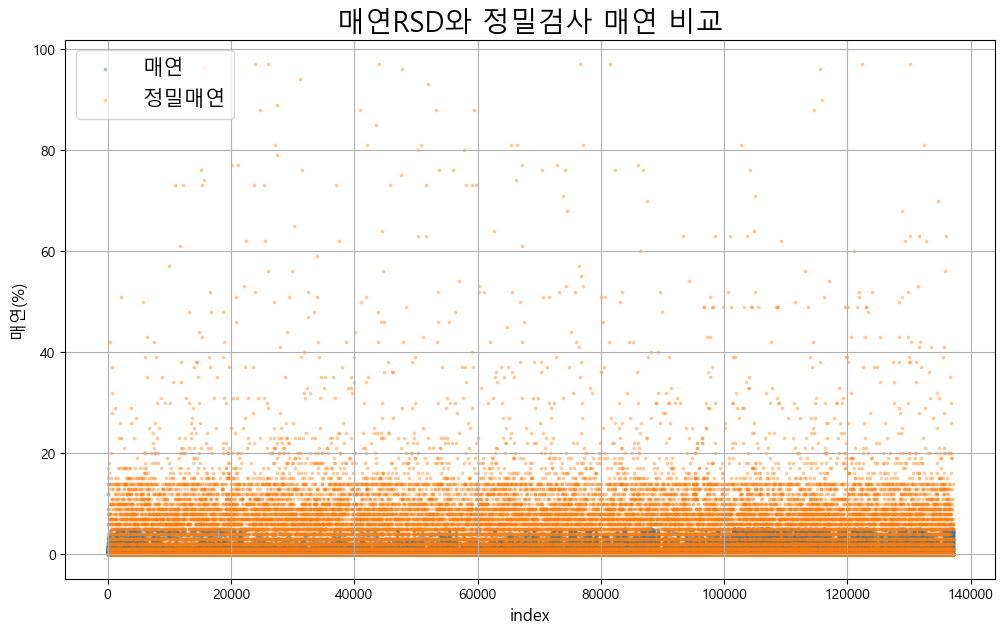

In [1367]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['매연'], s=3, alpha=.3, label='매연')
plt.scatter(die.index, die['무부하매연측정치1'], s=3, alpha=.3, label='정밀매연')
plt.title('매연RSD와 정밀검사 매연 비교', fontsize=20)
plt.xlabel('index', fontsize=12)
plt.ylabel('매연(%)', fontsize=12)
plt.legend(fontsize=15);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


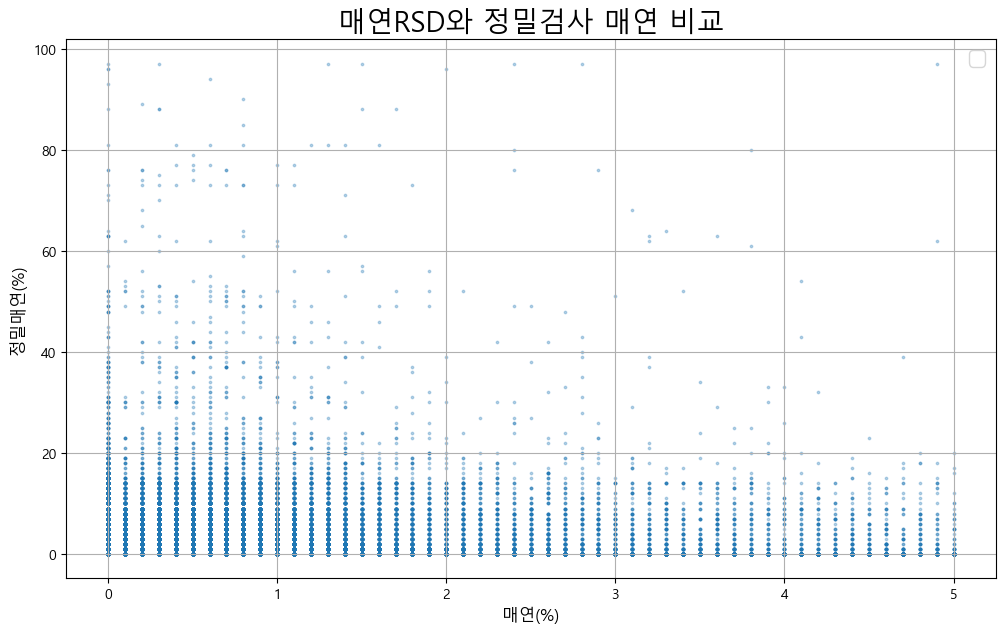

In [1368]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die['매연'], die['무부하매연측정치1'], s=3 ,alpha=.3)
plt.title('매연RSD와 정밀검사 매연 비교', fontsize=20)
plt.xlabel('매연(%)', fontsize=12)
plt.ylabel('정밀매연(%)', fontsize=12)
plt.legend(fontsize=15);

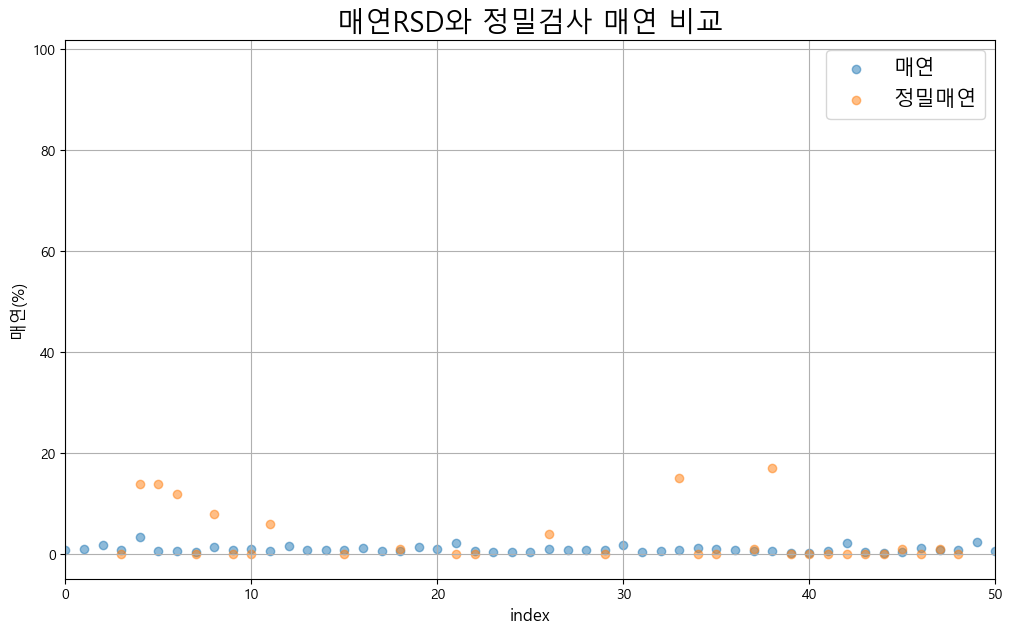

In [1369]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['매연'], alpha=.5, label='매연')
plt.scatter(die.index, die['무부하매연측정치1'], alpha=.5, label='정밀매연')
plt.xlim([0, 50])
plt.title('매연RSD와 정밀검사 매연 비교', fontsize=20)
plt.xlabel('index', fontsize=12)
plt.ylabel('매연(%)', fontsize=12)
plt.legend(fontsize=15);

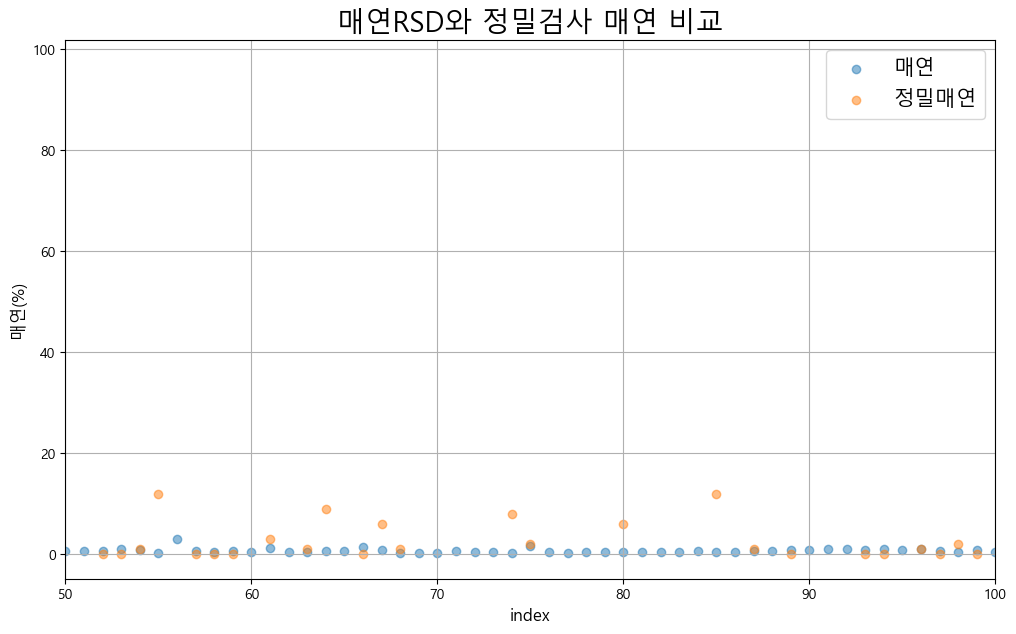

In [1370]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(die.index, die['매연'], alpha=.5, label='매연')
plt.scatter(die.index, die['무부하매연측정치1'], alpha=.5, label='정밀매연')
plt.xlim([50, 100])
plt.title('매연RSD와 정밀검사 매연 비교', fontsize=20)
plt.xlabel('index', fontsize=12)
plt.ylabel('매연(%)', fontsize=12)
plt.legend(fontsize=15);

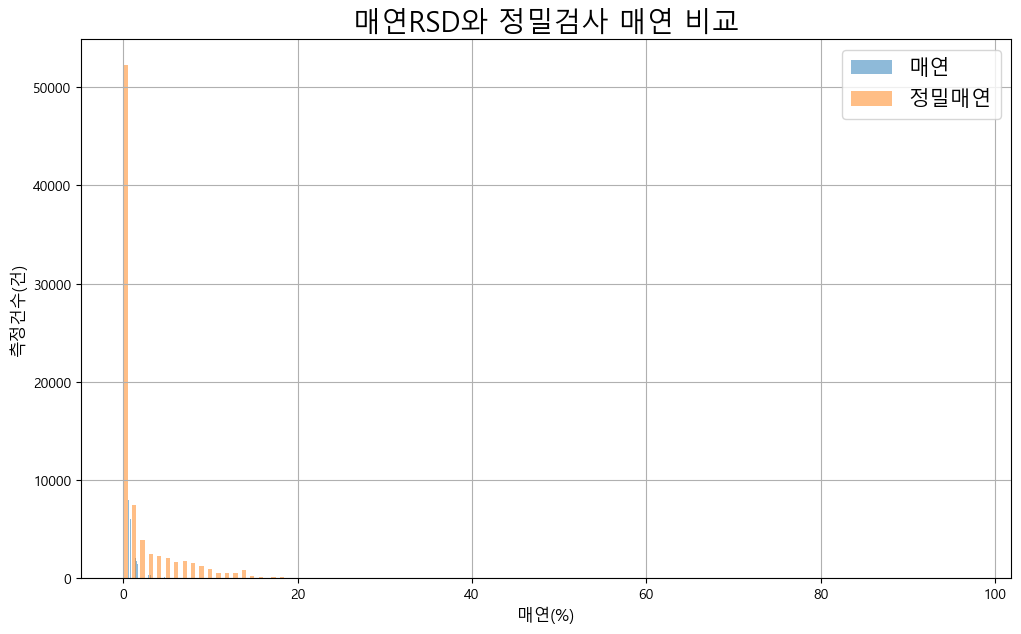

In [1371]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.hist(die['매연'], alpha=.5, label='매연', bins=200)
plt.hist(die['무부하매연측정치1'], alpha=.5, label='정밀매연', bins=200)
plt.title('매연RSD와 정밀검사 매연 비교', fontsize=20)
plt.xlabel('매연(%)', fontsize=12)
plt.ylabel('측정건수(건)', fontsize=12)
plt.legend(fontsize=15);

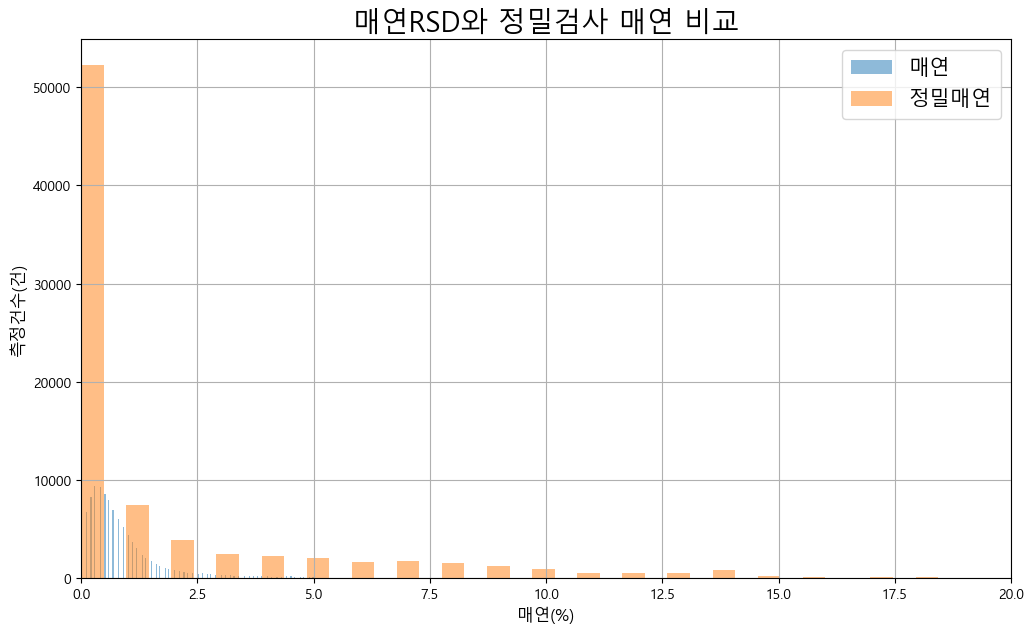

In [1372]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.hist(die['매연'], alpha=.5, label='매연', bins=200)
plt.hist(die['무부하매연측정치1'], alpha=.5, label='정밀매연', bins=200)
plt.xlim([0, 20])
plt.title('매연RSD와 정밀검사 매연 비교', fontsize=20)
plt.xlabel('매연(%)', fontsize=12)
plt.ylabel('측정건수(건)', fontsize=12)
plt.legend(fontsize=15);

### [❌] 25\. 종합검사의 매연측정결과 부적합비율
- 20 ~ 22번 한번에 처리

### [❌] (차후) 26\. 종합검사의 매연측정값 vs 매연RSD 매연값
- Q. 1대1 비교?

### 종합검사 매연 부적합 경유차 vs 매연RSD 매연값 비교

### [❌] (차후) 27\. 종합검사 매연농도 vs 매연RSD 매연농도 1:1비교

## 28\. 시험일 후 최초검사 부적합 - 매연RSD 값
- 최초 정밀검사 부적합 차량의 매연RSD 값 확인하여 오류-적합, 오류-부적합 확인
- 과정
    - 1. 유효데이터(매연제한 없음) 중 경유차 추출
    - 2. 운행차 정밀검사 기준으로 매연RSD 판정 부적합 데이터 추출
    - 3. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
    - 4. '검사날짜차이' > 0 인 샘플 추출
    - 5. '검사날짜차이' 오름차순, 자동차등록번호 중복 제거
    - 6. 정밀검사 '무부하매연판정1' 비율

In [1373]:
rcse.shape

(414226, 48)

In [1374]:
rcse.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [1375]:
# 1. 경유차(매연제한 없음) 중 유효데이터 추출
# vdfRecordStatus = N, vdfValid = V, samFlag = V, 차량번호 : nan, 오류 값(********) 제외, 경유
sdie = rcse[(rcse['기록상태'] == 'N') & (rcse['유효'] == 'V') & (rcse['플래그'] == 'V') & (rcse['차량번호'] != '********') & (rcse['차량번호'].isnull() == False) & (rcse['연료'] == '경유')].reset_index(drop=True)
sdie.shape

(142633, 48)

In [1376]:
sdie['연료'].unique()

array(['경유'], dtype=object)

In [1377]:
# 2. 운행차 정밀검사 기준으로 매연RSD 판정 부적합 데이터 추출
sdf28 = sdie[sdie['매연'] > sdie['무부하매연허용치1']].reset_index(drop=True)
sdf28.shape

(788, 48)

### [출력] RSD 부적합 데이터

In [1378]:
# sdf28.to_excel(os.path.join(an_fold, 'RSD부적합_경유.xlsx'), index=False)

In [1379]:
sdf28[['정밀검사일자', '측정날짜']].dtypes

정밀검사일자    object
측정날짜      object
dtype: object

In [1380]:
sdf28['정밀검사일자'] = pd.to_datetime(sdf28['정밀검사일자'])
sdf28['측정날짜'] = pd.to_datetime(sdf28['측정날짜'])
sdf28[['정밀검사일자', '측정날짜']].dtypes

정밀검사일자    datetime64[ns]
측정날짜      datetime64[ns]
dtype: object

In [1381]:
# 3-1. 정밀검사일자(정밀검사) - 측정날짜(원격측정) = 검사날짜차이
sdf28['검사날짜차이'] = sdf28['정밀검사일자'] - sdf28['측정날짜']
sdf28['검사날짜차이'] = sdf28['검사날짜차이'].astype('str')
sdf28['검사날짜차이'] = sdf28['검사날짜차이'].str.split(' ').str[0]
sdf28['검사날짜차이'] = pd.to_numeric(sdf28['검사날짜차이'], errors='coerce')

In [1382]:
# 3-2. '검사날짜차이' > 0 인 샘플 추출
sdf28 = sdf28[sdf28['검사날짜차이'] > 0].reset_index(drop=True)
sdf28.shape

(145, 49)

In [1383]:
# 4. '검사날짜차이' 오름차순
sdf28a = sdf28.sort_values('검사날짜차이').drop_duplicates('차량번호').reset_index(drop=True)
sdf28a.shape

(143, 49)

In [1384]:
sdf28a[['정밀검사일자', '측정날짜', '검사날짜차이']].head()

,정밀검사일자,측정날짜,검사날짜차이
0,2023-04-06,2023-04-04,2
1,2023-01-05,2023-01-03,2
2,2023-08-25,2023-08-23,2
3,2023-07-29,2023-07-26,3
4,2023-02-11,2023-02-06,5


In [1385]:
# 5. 정밀검사 '무부하매연판정1' 비율
grp28 = sdf28a['무부하매연판정1'].value_counts(dropna=False, normalize=True).reset_index()
grp28 = grp28.rename(columns={'무부하매연판정1':'매연판정', 'proportion':'판정비율'})
grp28['판정비율'] = grp28['판정비율'].round(2)
grp28.loc[grp28.shape[0]] = ['총합', round(grp28['판정비율'].sum(), 2)]
grp28

,매연판정,판정비율
0,Y,0.99
1,N,0.01
2,총합,1.00


## 29\. 시험일 후 최종검사 부적합 - 매연RSD값
- 과정
    - 1. 유효데이터(매연제한 없음) 중 경유차 추출
    - 2. 운행차 정밀검사 기준으로 매연RSD 판정 부적합 데이터 추출
    - 3. 검사일자(정밀검사) - 검사날짜(원격측정) = 검사날짜차이
    - 4. '검사날짜차이' > 0 인 샘플 추출
    - 5. '검사날짜차이' 내림차순, 자동차등록번호 중복 제거
    - 6. 정밀검사 '무부하매연판정1' 비율

In [1386]:
# 1 ~ 3-2. 동일 과정
# 4. '검사날짜차이' 내림차순
sdf29 = sdf28.sort_values('검사날짜차이', ascending=False).drop_duplicates('차량번호').reset_index(drop=True)
sdf29.shape

(143, 49)

In [1387]:
sdf29[['정밀검사일자', '측정날짜', '검사날짜차이']].head()

,정밀검사일자,측정날짜,검사날짜차이
0,2023-09-07,2022-10-18,324
1,2023-09-06,2022-10-24,317
2,2023-08-21,2022-10-24,301
3,2023-08-12,2022-10-18,298
4,2023-08-30,2022-11-08,295


In [1388]:
# 5. 정밀검사 '무부하매연판정1' 비율
grp29 = sdf29['무부하매연판정1'].value_counts(dropna=False, normalize=True).reset_index()
grp29 = grp29.rename(columns={'무부하매연판정1':'매연판정', 'proportion':'판정비율'})
grp29['판정비율'] = grp29['판정비율'].round(2)
grp29.loc[grp29.shape[0]] = ['총합', round(grp29['판정비율'].sum(), 2)]
grp29

,매연판정,판정비율
0,Y,0.99
1,N,0.01
2,총합,1.00


## 종합검사 NOx 부적합 경유차 vs 매연RSD 매연값 비교

### [❌] (차후) 30\. 종합검사 NOx vs 매연RSD 매연농도 1:1비교

## 고정식 다차선 매연 원격측정기 유효 측정수량 검토

### [❌] (보류) 31\. 일자별 유효 측정수량
- 1. 전체 통과 차량 건수 : UFM 사진파일 수 기록
- 2. 다차선 매연RSD측정 건수 : 해당일 매연RSD측정 유효데이터 건수
- 3. 유효율 : b번 / a번 *100(%)

## 32\. 매연농도 상위 5% 단위 측정건수 및 매연 기여도 분석

In [1389]:
die.shape

(137148, 57)

In [1390]:
die.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '속도구분', '속도구분인덱스',
       '배기량구분', '배기량구분인덱스', '총중량구분', '총중량구분인덱스', '매연구분', '매연구분인덱스', '연식구분'],
      dtype='object')

In [1391]:
srt32_1 = die.sort_values('매연', ascending=False).reset_index(drop=True)
srt32_1.head()

,측정날짜,측정시간,기록상태,유효,속도,가속도,플래그,VSP,매연,차량번호,...,무부하매연판정6,속도구분,속도구분인덱스,배기량구분,배기량구분인덱스,총중량구분,총중량구분인덱스,매연구분,매연구분인덱스,연식구분
0,2023-10-30,15:07:43,N,V,106.56,0.72,V,37.48,5.00,69더3400,...,NaN,100이상 110미만,11.00,1천이상 2천미만,1.00,1천이상 2천미만,2.00,4.5이상,10.00,2014.0
1,2023-10-28,12:16:39,N,V,94.32,0.72,V,31.66,5.00,14소0871,...,NaN,90이상 100미만,10.00,2천이상 3천미만,2.00,1천이상 2천미만,2.00,4.5이상,10.00,2016.0
2,2023-10-17,15:47:47,N,V,74.52,-0.36,V,16.54,5.00,11무0950,...,NaN,70이상 80미만,8.00,1천이상 2천미만,1.00,1천이상 2천미만,2.00,4.5이상,10.00,2016.0
3,2023-11-02,09:14:34,N,V,57.60,0.00,V,13.71,5.00,88더7489,...,NaN,50이상 60미만,6.00,2천이상 3천미만,2.00,3천이상 4천미만,4.00,4.5이상,10.00,2013.0
4,2023-10-17,15:55:48,N,V,68.76,-0.36,V,14.90,5.00,40거7282,...,NaN,60이상 70미만,7.00,1천이상 2천미만,1.00,1천이상 2천미만,2.00,4.5이상,10.00,2007.0


In [1392]:
div = math.ceil(srt32_1.shape[0] * 0.05)
div

6858

In [1393]:
n = 5
for i in range(9):
    srt32_1.loc[i*div:(i+1)*div, '상위구분'] = f'{i*n}-{(i+1)*n}%'
srt32_1.loc[9*div:, '상위구분'] = '45%~'
srt32_1['상위구분'].unique()

array(['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%',
       '35-40%', '40-45%', '45%~'], dtype=object)

In [1394]:
srt32_1[srt32_1['상위구분'] == '0-5%'].shape

(6858, 58)

In [1395]:
grp32 = srt32_1.groupby(['상위구분'], dropna=False).agg({'매연':'mean', '차량번호':'count'}).reset_index()
grp32 = grp32.rename(columns={'매연':'매연_RSD평균(%)', '차량번호':'측정건수(건)'})
grp32.loc[grp32.shape[0], ['상위구분', '측정건수(건)']] = ['합계', grp32['측정건수(건)'].sum()]
grp32

,상위구분,매연_RSD평균(%),측정건수(건)
0,0-5%,3.53,6858.00
1,10-15%,1.47,6858.00
2,15-20%,1.18,6858.00
3,20-25%,1.00,6858.00
4,25-30%,0.86,6858.00
5,30-35%,0.75,6858.00
6,35-40%,0.65,6858.00
7,40-45%,0.56,6858.00
8,45%~,0.16,75426.00
9,5-10%,2.03,6858.00


## 33\. 연식별 측정건수 중 매연 8% 초과 비율 분석

In [1396]:
rcse.shape

(414226, 48)

In [1397]:
# vdfRecordStatus = N, vdfValid = V, samFlag = V, 차량번호 : nan, 오류 값(********) 제외
srt33_1 = rcse[(rcse['기록상태'] == 'N') & (rcse['유효'] == 'V') & (rcse['플래그'] == 'V') & (rcse['차량번호'] != '********') & (rcse['차량번호'].isnull() == False)].reset_index(drop=True)
srt33_1.shape

(414226, 48)

In [1398]:
srt33_1['매연'].describe()

count   414226.00
mean         1.08
std          2.17
min          0.00
25%          0.00
50%          0.50
75%          1.10
max         29.80
Name: 매연, dtype: float64

In [1399]:
srt33_1.loc[srt33_1['매연'] > 8].shape

(8992, 48)

In [1400]:
srt33_1.loc[srt33_1['매연'] > 8, '매연_8%초과'] = '매연_8%초과'

In [1401]:
srt33_1['연식'].dtype

dtype('float64')

In [1402]:
srt33_1['연식'].unique()

array([2012., 2021., 2016., 2013., 2020., 2015., 2011., 2006., 2008.,
         nan, 2010., 2023., 2017., 2004., 2018., 2022., 2014., 2007.,
       2009., 2019., 2002., 2001., 2005., 2003., 1993., 1995., 2024.,
       1999., 1998., 1997., 1996., 2000., 1983., 1992., 1994., 1991.,
       1990., 1988.])

In [1403]:
srt33_1.loc[srt33_1['연식'] <= 2000, '연식구분'] = '2000년 이하'
srt33_1.loc[srt33_1['연식구분'].isnull(), '연식구분'] = srt33_1.loc[srt33_1['연식구분'].isnull(), '연식']
srt33_1['연식구분'].unique()

array([2012.0, 2021.0, 2016.0, 2013.0, 2020.0, 2015.0, 2011.0, 2006.0,
       2008.0, nan, 2010.0, 2023.0, 2017.0, 2004.0, 2018.0, 2022.0,
       2014.0, 2007.0, 2009.0, 2019.0, 2002.0, 2001.0, 2005.0, 2003.0,
       '2000년 이하', 2024.0], dtype=object)

In [1404]:
srt33_1['연식'].isnull().sum()

89980

In [1405]:
grp33 = srt33_1.groupby(['연식구분'], dropna=False).agg({'차량번호':'count', '매연_8%초과':'count'}).reset_index()
grp33['매연 8%초과건수 비율'] = grp33['매연_8%초과'] / grp33['차량번호']
grp33.loc[grp33.shape[0], ['연식구분', '차량번호', '매연_8%초과']] = ['합계', grp33['차량번호'].sum(), grp33['매연_8%초과'].sum()]
grp33 = grp33.rename(columns={'차량번호':'측정건수(건)', '매연_8%초과':'매연 8%초과건수(건)'})
grp33

,연식구분,측정건수(건),매연 8%초과건수(건),매연 8%초과건수 비율
0,2001.00,225.00,12.00,0.05
1,2002.00,511.00,13.00,0.03
2,2003.00,451.00,18.00,0.04
3,2004.00,636.00,7.00,0.01
4,2005.00,1309.00,25.00,0.02
5,2006.00,1784.00,34.00,0.02
6,2007.00,4178.00,82.00,0.02
7,2008.00,5240.00,124.00,0.02
8,2009.00,5668.00,120.00,0.02
9,2010.00,9802.00,197.00,0.02


## 34\. 매연RSD 상위3% 매연 농도 vs 종합검사 매연 비교
- 해당 데이터 추출 방법
    - 1. 매연RSD + 등록제원 + 정밀(사용 가능한 데이터만 추출)
    - 2. 경유만 추출
    - 3. 정밀검사측정방법별 데이터 정리
        - KD-147 -> 무부하매연측정치1 사용
        - LUG DOWN and 총 중량 5.5톤 미만 -> 무부하매연측정치1 사용
        - LUG DOWN and 총 중량 5.5톤 이상 -> 무부하매연측정치1 ~ 3 중 가장 큰 값 사용
    - 4. 매연RSD 측정시점에 가장 가까운 검사 기록만 추출
        - A안(⭕)
            - 측정시점과 정밀검사일자 차이 계산(측정날짜 - 정밀검사일자)
            - a. 측정시점 전 데이터(차이가 양수) 중 가장 큰 값 추출
            - b. 측정시점 후 데이터(차이가 음수 또는 0) 중 가장 작은 값 추출
            - a, b를 '날짜차이' 내림차순 정렬 후 '차량번호' 기준 중복 제거
        - B안
            - 측정시점과 정밀검사일자 차이 계산
            - 검사 기록 추출
                - 차량당 양수값이 존재하면, 양수 중 가장 작은 값 데이터 추출
                - 차량당 음수값만 존재하면, 음수 중 가장 큰 값 데이터 추출
            - '차량번호' 기준 중복 제거(같은 차이 값 존재 가능성 때문에)
    - 5. 매연RSD 매연 상위 3% 해당 데이터만 추출

### 1\. 매연RSD + 등록제원 + 정밀(사용 가능한 데이터만 추출)

In [1406]:
total_rcse = rcs.merge(eetr_total, on='차대번호', how='left')
total_rcse.shape

(510647, 48)

In [1407]:
total_rcse.shape

(510647, 48)

In [1408]:
# vdfRecordStatus = N, vdfValid = V, samFlag = V, 차량번호 : nan, 오류 값(********) 제외, 매연 5% 초과 제외
total_df = total_rcse[(total_rcse['기록상태'] == 'N') & (total_rcse['유효'] == 'V') & (total_rcse['플래그'] == 'V') & (total_rcse['차량번호'] != '********') & (total_rcse['차량번호'].isnull() == False)].reset_index(drop=True)
total_df.shape

(510647, 48)

In [1409]:
total_df.shape

(510647, 48)

### 2\. 경유만 추출

In [1410]:
total_df['연료'].value_counts(dropna=False)

연료
경유             248278
휘발유            162277
LPG(액화석유가스)     37654
휘발유 하이브리드       27697
NaN             22420
전기               8065
CNG(압축천연가스)      2116
수소                964
경유 하이브리드          951
LPG 하이브리드         225
Name: count, dtype: int64

In [1411]:
srt34_1 = total_df[total_df['연료'] == '경유'].reset_index(drop=True)
srt34_1.shape

(248278, 48)

### 3\. 정밀검사측정방법별 데이터 정리
- KD-147 -> 무부하매연측정치1 사용
- LUG DOWN and 총 중량 5.5톤 미만 -> 무부하매연측정치1 사용
- LUG DOWN and 총 중량 5.5톤 이상 -> 무부하매연측정치1 ~ 3 중 가장 큰 값 사용

In [1412]:
srt34_1.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [1413]:
srt34_1[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].isnull().sum()

무부하매연측정치1     68346
무부하매연측정치2    140472
무부하매연측정치3    162619
dtype: int64

In [1414]:
srt34_1['정밀검사측정방법'].unique()

array(['부하검사(KD-147)', nan, '무부하검사(급가속)', '부하검사(LUG DOWN)',
       '부하검사(ASM-Idling)'], dtype=object)

In [1415]:
srt34_2 = srt34_1[(srt34_1['정밀검사측정방법'] == '부하검사(KD-147)') | (srt34_1['정밀검사측정방법'] == '부하검사(LUG DOWN)')].reset_index(drop=True)
srt34_2.shape

(168244, 48)

In [1416]:
srt34_2.loc[srt34_2['정밀검사측정방법'] == '부하검사(KD-147)', '종합검사매연'] = srt34_2.loc[srt34_2['정밀검사측정방법'] == '부하검사(KD-147)', '무부하매연측정치1']
srt34_2.loc[(srt34_2['정밀검사측정방법'] == '부하검사(LUG DOWN)') & (srt34_2['총중량'] < 5500), '종합검사매연'] = srt34_2.loc[(srt34_2['정밀검사측정방법'] == '부하검사(LUG DOWN)') & (srt34_2['총중량'] < 5500), '무부하매연측정치1']
srt34_2.loc[(srt34_2['정밀검사측정방법'] == '부하검사(LUG DOWN)') & (srt34_2['총중량'] >= 5500), '종합검사매연'] = srt34_2.loc[(srt34_2['정밀검사측정방법'] == '부하검사(LUG DOWN)') & (srt34_2['총중량'] >= 5500), ['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].max(axis=1)
srt34_2['종합검사매연'].isnull().sum()

5848

### 4\. 매연RSD 측정시점에 가장 가까운 검사 기록만 추출
- A안(⭕)
    - 측정시점과 정밀검사일자 차이 계산(측정날짜 - 정밀검사일자)
    - a. 측정시점 전 데이터(차이가 양수) 중 가장 큰 값 추출
    - b. 측정시점 후 데이터(차이가 음수) 중 가장 작은 값 추출
    - a, b를 '날짜차이' 내림차순 정렬 후 '차량번호' 기준 중복 제거
- B안
    - 측정시점과 정밀검사일자 차이 계산
    - 검사 기록 추출
        - 차량당 양수값이 존재하면, 양수 중 가장 작은 값 데이터 추출
        - 차량당 음수값만 존재하면, 음수 중 가장 큰 값 데이터 추출
    - '차량번호' 기준 중복 제거(같은 차이 값 존재 가능성 때문에)

In [1417]:
srt34_2.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '종합검사매연'],
      dtype='object')

In [1418]:
srt34_2[['측정날짜', '정밀검사일자']].dtypes

측정날짜      datetime64[ns]
정밀검사일자    datetime64[ns]
dtype: object

In [1419]:
srt34_2[['측정날짜', '정밀검사일자']].isnull().sum()

측정날짜      0
정밀검사일자    0
dtype: int64

In [1420]:
srt34_2['날짜차이'] = (srt34_2['측정날짜'] - srt34_2['정밀검사일자']).dt.days
srt34_2['날짜차이'].head()

0    461
1    447
2   -242
3    553
4    164
Name: 날짜차이, dtype: int64

In [1421]:
srt34_2['날짜차이'].describe()

count   168244.00
mean       368.54
std        254.05
min       -335.00
25%        158.00
50%        358.00
75%        570.00
max        921.00
Name: 날짜차이, dtype: float64

In [1422]:
srt34_2.shape

(168244, 50)

In [1423]:
srt34_3before = srt34_2[srt34_2['날짜차이'] > 0].reset_index(drop=True)
srt34_3after = srt34_2[srt34_2['날짜차이'] <= 0].reset_index(drop=True)
srt34_3before.shape, srt34_3after.shape, srt34_3before.shape[0] + srt34_3after.shape[0]

((158462, 50), (9782, 50), 168244)

In [1424]:
srt34_3before.sort_values(['차량번호', '날짜차이'], ascending=[True, True])[['차량번호', '날짜차이']].head()

,차량번호,날짜차이
111250,01가0350,514
57879,01가0656,473
60152,01가0656,474
71016,01가0656,488
140748,01가0656,562


In [1425]:
srt34_3before.sort_values(['차량번호', '날짜차이'], ascending=[True, True]).drop_duplicates('차량번호').reset_index(drop=True)[['차량번호', '날짜차이']].head()

,차량번호,날짜차이
0,01가0350,514
1,01가0656,473
2,01가1396,250
3,01가2434,137
4,01가5778,264


In [1426]:
srt34_3after.sort_values(['차량번호', '날짜차이'], ascending=[True, False])[['차량번호', '날짜차이']].head(10)

,차량번호,날짜차이
3899,01고6697,-70
649,01고6806,-121
847,01나6593,-94
5906,01나8412,-26
144,01다1159,-164
5772,01다9545,-66
489,01두1408,-6
5022,01두9699,-48
1939,01두9699,-82
6082,01러1587,-1


In [1427]:
srt34_3after.sort_values(['차량번호', '날짜차이'], ascending=[True, False]).drop_duplicates('차량번호').reset_index(drop=True)[['차량번호', '날짜차이']].head(10)

,차량번호,날짜차이
0,01고6697,-70
1,01고6806,-121
2,01나6593,-94
3,01나8412,-26
4,01다1159,-164
5,01다9545,-66
6,01두1408,-6
7,01두9699,-48
8,01러1587,-1
9,01러6546,-52


In [1428]:
srt34_4before = srt34_3before.sort_values(['차량번호', '날짜차이'], ascending=[True, True]).drop_duplicates('차량번호').reset_index(drop=True)
srt34_4after = srt34_3after.sort_values(['차량번호', '날짜차이'], ascending=[True, False]).drop_duplicates('차량번호').reset_index(drop=True)
srt34_4before.shape, srt34_4after.shape, srt34_4before.shape[0] + srt34_4after.shape[0]

((41428, 50), (6232, 50), 47660)

In [1429]:
srt34_4 = pd.concat([srt34_4before, srt34_4after], ignore_index=True)
srt34_4.shape

(47660, 50)

In [1430]:
temp = srt34_4.sort_values(['차량번호', '날짜차이'], ascending=[True, False])[['차량번호', '날짜차이']]
temp[temp['차량번호'].duplicated(keep=False)][['차량번호', '날짜차이']].head()

,차량번호,날짜차이
16,01고6697,3
41428,01고6697,-70
63,01러1587,12
41436,01러1587,-1
66,01러6546,92


In [1431]:
srt34_5 = srt34_4.sort_values(['차량번호', '날짜차이'], ascending=[True, False]).drop_duplicates('차량번호').reset_index(drop=True)
srt34_5.shape

(42574, 50)

In [1432]:
srt34_5.loc[srt34_5['차량번호'] == '01고6697', ['차량번호', '날짜차이']]

,차량번호,날짜차이
16,01고6697,3


### 5\. 매연RSD 매연 상위 3% 해당 데이터만 추출

In [1433]:
srt34_6 = srt34_5.sort_values('매연', ascending=False).reset_index(drop=True)
srt34_6.shape

(42574, 50)

In [1434]:
srt34_6.shape[0] * 0.03, math.floor(srt34_6.shape[0] * 0.03)

(1277.22, 1277)

In [1435]:
top3per = math.floor(srt34_6.shape[0] * 0.03)
srt34_7 = srt34_6.iloc[:top3per+1]
srt34_7.shape

(1278, 50)

In [1436]:
srt34_7.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '종합검사매연', '날짜차이'],
      dtype='object')

#### [출력] 매연 상위 3% 데이터

In [1437]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20240115'

In [1438]:
sdf34 = srt34_7[[
    '측정날짜',
    '측정시간',
    '기록상태',
    '유효',
    '속도',
    '가속도',
    '플래그',
    'VSP',
    # '차선번호',
    # '풍속',
    # '습도',
    # '온도',
    # '측정장소코드',
    '차대번호',
    '차량번호',
    '연료',
    '연식',
    '배기량',
    '차종',
    '총중량',
    '엔진형식',
    '등급',
    '차명',
    '폐차여부',
    '정밀검사일자',
    '정밀검사종류',
    # '관능검사판정',
    '매연',
    '종합검사매연',
    '정밀검사판정',
    '정밀검사측정방법',
    # '무부하매연측정치1',
    # '무부하매연허용치1',
    # '무부하매연판정1',
    # '무부하매연측정치2',
    # '무부하매연허용치2',
    # '무부하매연판정2',
    # '무부하매연측정치3',
    # '무부하매연허용치3',
    # '무부하매연판정3',
    # '무부하매연측정치4',
    # '무부하매연허용치4',
    # '무부하매연판정4',
    # '무부하매연측정치5',
    # '무부하매연허용치5',
    # '무부하매연판정5',
    # '무부하매연측정치6',
    # '무부하매연허용치6',
    # '무부하매연판정6',
    # '날짜차이'
       ]]
sdf34.shape

(1278, 25)

In [1439]:
sdf34.to_excel(os.path.join(an_fold, f'34_매연_상위3%_데이터_{today_date}.xlsx'), index=False)

## 35\. 중복 측정 차량 매연 통계
- 1\. 3 <= VSP < 22
- 2\. 중복 측정 차량만 추출
- 3\. 차량당 매연 평균, 편차

In [1440]:
srt34_1.shape

(248278, 48)

In [1441]:
srt34_1['VSP'].describe()

count   248278.00
mean        14.30
std        100.85
min       -134.53
25%         10.42
50%         13.61
75%         17.30
max      48750.00
Name: VSP, dtype: float64

In [1442]:
srt35_1 = srt34_1[(srt34_1['VSP'] >= 3) & (srt34_1['VSP'] < 22)].reset_index(drop=True)
srt35_1.shape

(222342, 48)

In [1443]:
srt35_2 = srt35_1[srt35_1['차량번호'].duplicated(keep=False)].sort_values('차량번호').reset_index(drop=True)
srt35_2.shape

(188009, 48)

In [1444]:
srt35_3 = srt35_2.copy()
srt35_3['매연평균'] = srt35_3.groupby(['차량번호'])['매연'].transform('mean')
srt35_3['매연편차'] = srt35_3['매연'] - srt35_3['매연평균']
srt35_3.shape

(188009, 50)

In [1445]:
srt35_3[['차량번호', '매연', '매연평균', '매연편차']].isnull().sum()

차량번호    0
매연      0
매연평균    0
매연편차    0
dtype: int64

In [1446]:
srt35_3[['차량번호', '매연', '매연평균', '매연편차']].head()

,차량번호,매연,매연평균,매연편차
0,01가0338,1.20,0.60,0.60
1,01가0338,0.00,0.60,-0.60
2,01가0656,0.50,0.65,-0.15
3,01가0656,0.00,0.65,-0.65
4,01가0656,1.20,0.65,0.55


### [출력] 중복 측정 차량 매연 통계

In [1447]:
srt35_3.shape

(188009, 50)

In [1448]:
srt35_3.columns

Index(['측정날짜', '측정시간', '기록상태', '유효', '속도', '가속도', '플래그', 'VSP', '매연', '차량번호',
       '차선번호', '풍속', '습도', '온도', '측정장소코드', '연료', '연식', '배기량', '차종', '총중량',
       '엔진형식', '등급', '차대번호', '차명', '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정',
       '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '매연평균', '매연편차'],
      dtype='object')

In [1449]:
# 1m 24.4s
srt35_3.to_excel(os.path.join(an_fold, f'35_중복측정차량_매연통계_{today_date}.xlsx'), index=False)

## 결과 출력

In [1450]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20240115'

In [1451]:
with pd.ExcelWriter(os.path.join(an_fold, f'매연RSD측정결과_분석(제공차량제원)({today_date}).xlsx')) as writer:
    grp1.to_excel(writer, sheet_name='1_연료별', index=False)
    grp2.to_excel(writer, sheet_name='2_경유_차종별', index=False)
    grp3.to_excel(writer, sheet_name='3_경유_연식별', index=False)
    grp4.to_excel(writer, sheet_name='4_경유_차선별', index=False)
    grp5.to_excel(writer, sheet_name='5_경유_속도별', index=False)
    grp6.to_excel(writer, sheet_name='6_경유_배출가스등급별', index=False)
    grp7.to_excel(writer, sheet_name='7_경유_배기량별', index=False)
    grp8.to_excel(writer, sheet_name='8_경유_차량중량별', index=False)
    grp9.to_excel(writer, sheet_name='9_경유_매연허용기준별', index=False)
    grp10.to_excel(writer, sheet_name='10_경유_NOx허용기준별', index=False)

    grp11.to_excel(writer, sheet_name='11_농도별', index=False)
    grp12.to_excel(writer, sheet_name='12_농도_차종별', index=True)
    grp13.to_excel(writer, sheet_name='13_농도_연식별', index=True)
    grp14.to_excel(writer, sheet_name='14_농도_측정속도별', index=True)
    grp15.to_excel(writer, sheet_name='15_농도_배출가스등급별', index=True)
    grp16.to_excel(writer, sheet_name='16_농도_배기량별', index=True)
    grp17.to_excel(writer, sheet_name='17_농도_차량중량별', index=True)
    grp18.to_excel(writer, sheet_name='18_농도_매연허용기준별', index=True)
    grp19.to_excel(writer, sheet_name='19_농도_NOx허용기준별', index=True)

    grp20.to_excel(writer, sheet_name='20_매연_적합_부적합비율(상위10%)', index=False)
    grp21.to_excel(writer, sheet_name='21_매연_적합_부적합비율(하위90%)', index=False)
    grp22.to_excel(writer, sheet_name='22_매연_적합_부적합비율(하위10%)', index=False)
    grp23.to_excel(writer, sheet_name='23_엔진형식별_매연_정밀매연', index=False)
    # grp24.to_excel(writer, sheet_name='24_매연_정밀매연_비교', index=False) # 시각화방법 고민
    # grp25.to_excel(writer, sheet_name='25_매연_적합_부적합비율', index=False) # 20 ~ 22번 한번에 처리
    # grp26.to_excel(writer, sheet_name='26_매연측정값과_매연RSD비교', index=False) # 차후 논의

    # grp27.to_excel(writer, sheet_name='27_매연농도와_매연RSD_1대1비교', index=False) # 차후 논의
    
    grp28.to_excel(writer, sheet_name='28_시험일후_최초검사_부적합', index=False) # 문의 필요
    grp29.to_excel(writer, sheet_name='29_시험일후_최종검사_부적합', index=False) # 문의 필요

    # grp30.to_excel(writer, sheet_name='30_종합검사NOx와_RSD매연_1대1비교', index=False) # 차후 논의

    # grp31.to_excel(writer, sheet_name='31_일자별_유효_측정수량', index=False) # 보류

    grp32.to_excel(writer, sheet_name='32_매연농도_상위5%단위_측정건수_매연기여도분석', index=False)
    grp33.to_excel(writer, sheet_name='33_연식별_측정건수_중_매연8%초과_비율분석', index=False)

In [1452]:
sec = time.time() - start_time
print(str(dt.timedelta(seconds=sec)).split('.')[0])

0:01:44


# End